In [1]:
import sys
import os

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (25, 20),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
import geopandas as gpd
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from matplotlib.pyplot import figure
from tabulate import tabulate

In [3]:
## get location of stolen and recover places and check if it is the same
def compare_places(row):
    stolen,rec= row['stolen_bikes_place'],row['recover_bikes_place']
    stolen_list, rec_list = stolen.split(','),rec.split(',')
    # if one of the places not has information about the city compare the states
    if stolen_list[0]=='' or rec_list[0]=='':
        if stolen_list[1] ==rec_list[1]:
            return 'same'
    else:
        if stolen_list[0] ==rec_list[0]:
            return 'same'
    return 'diff'

In [6]:
os.chdir(sys.path[3])
rec_file = pd.read_csv(r'data/process/res_with_geo_loc_rec.csv')
rec_file['is_same'] = rec_file[['stolen_bikes_place','recover_bikes_place']].apply(compare_places,axis=1)

In [7]:

os.chdir(sys.path[3])
data_raw = pd.read_csv(r'data/process/new_data.csv', skiprows=[1, 2]).reset_index()
is_same = 'is_same'
# Add is_same to raw data
data_raw.set_index('ResponseId',inplace=True)
rec_file.set_index('ResponseId',inplace=True)
data_raw[is_same] = rec_file[is_same]
data_raw.reset_index(inplace=True)
data_general= data_raw[data_raw['is_same'].notnull()]


In [11]:
data_general

,ResponseId,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,...,Q34,Q35,Q36,Q37,Q38,Q39,Q39_10_TEXT,Q40,Q40_3_TEXT,is_same
4,R_3F2LBFhUg7Q8AbI,4,4/22/2022 9:08,4/22/2022 9:24,IP Address,24.52.45.71,100,968,True,4/22/2022 9:24,...,1959.0,Man,"Between $100,000 and $149,999 per year",Three,Associate’s/vocational/technical degree (2- or...,Multi-ethnic (2+ ethnic groups),NaN,Email,NaN,same
12,R_dhfK2aYioBlxNBv,12,4/22/2022 11:59,4/22/2022 12:06,IP Address,172.58.46.144,100,447,True,4/22/2022 12:06,...,1950.0,Man,"Under $20,000 per year",One,Some university (no degree),"European (e.g., British Isles, German, French,...",NaN,Other (please specify):,Online,same
15,R_2aa7pZekXZm89pb,15,4/22/2022 15:46,4/22/2022 15:54,IP Address,172.58.24.250,100,431,True,4/22/2022 15:54,...,1966.0,Man,"Under $20,000 per year",Two,Associate’s/vocational/technical degree (2- or...,Multi-ethnic (2+ ethnic groups),NaN,Email,NaN,same
18,R_1hLTjwnbRFOjKOD,18,4/22/2022 18:11,4/22/2022 18:17,IP Address,23.17.63.224,100,365,True,4/22/2022 18:17,...,1966.0,Woman,"$200,000 or more per year",Five or more,Bachelor’s degree (university 4-year degree) ...,"European (e.g., British Isles, German, French,...",NaN,Email,NaN,same
20,R_AI2OiSntoyzHkNX,20,4/23/2022 18:00,4/23/2022 18:14,IP Address,72.198.57.234,100,834,True,4/23/2022 18:14,...,1948.0,Man,"Between $150,000 and $199,999 per year",Three,Bachelor’s degree (university 4-year degree) ...,"European (e.g., British Isles, German, French,...",NaN,Email,NaN,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,R_YSIuSlYqzqWbv57,1976,6/1/2022 9:10,6/1/2022 10:44,IP Address,98.171.142.89,100,5626,True,6/1/2022 10:44,...,1971.0,Man,"Between $50,000 and $74,999 per year",Five or more,Associate’s/vocational/technical degree (2- or...,I prefer to not answer,NaN,Other (please specify):,Random face book link,same
1986,R_2DSndRdlUwJM5Fr,1986,6/1/2022 21:01,6/1/2022 21:08,IP Address,174.194.202.64,100,378,True,6/1/2022 21:08,...,1977.0,Woman,"Between $100,000 and $149,999 per year",Four,"Graduate degree (e.g., Master’s, Professional ...","European (e.g., British Isles, German, French,...",NaN,Other (please specify):,Facebook,same
1988,R_DeZUrzWw0Cq2Zbj,1988,6/2/2022 6:04,6/2/2022 6:09,IP Address,104.62.161.218,100,328,True,6/2/2022 6:09,...,1970.0,Man,"Between $75,000 and $99,999 per year",Five or more,Bachelor’s degree (university 4-year degree) ...,"European (e.g., British Isles, German, French,...",NaN,"A bicycle registry/recovery system (e.g., Bike...",NaN,same
2011,R_25GzXFZytf3CUK5,2011,6/4/2022 12:30,6/5/2022 14:34,IP Address,98.60.66.166,100,93867,True,6/5/2022 14:34,...,1992.0,Man,"Between $100,000 and $149,999 per year",Four,"Graduate degree (e.g., Master’s, Professional ...","European (e.g., British Isles, German, French,...",NaN,Email,NaN,same


## Questions analysis based on recovery and non-recovery:

In [8]:
cols = list(data_general['is_same'].unique())
per_cols_by_ans = ['per_'+ col for col in cols]
colors =['green','orange']

## All the demographic parameters

In [9]:
data_store= []
# The code run over each tuple
for pair in {'Q2':'part','Q4':'year','Q5':'month','Q6':'day_time','Q7':'is_locked','Q8':'locked_type','Q9':'theft_location','Q10':'is_regi','Q11':'report_loc','Q12':'is_insured','Q14':'is_electric','Q15':'bike_type','Q17':'is_university','Q19':'is_online','Q21':'is_police_assist','Q23':'recovery_loc','Q24':'con_recovery','Q34': 'birth', 'Q35': 'gender', 'Q36': 'income', 'Q38': 'education', 'Q39': 'ethnic_origin'}.items():
    print(pair)
    # Get the question number and its new name
    question_number = pair[0]
    per_name = pair[1]
    # count stat per non/recovery and question_number
    sumy = DataFrame(index=list(data_general[data_general[question_number].notnull()][question_number].unique()))
    for i,name in enumerate(cols):
        rel_demographic = DataFrame(data_general[data_general['is_same'] == name][question_number])

        # Rearrange data
        rel_demographic = rel_demographic.rename(columns={question_number: per_name})
        rel_demographic = rel_demographic[rel_demographic[per_name].notna()].reset_index()

        # calculate absolute and relative count for each veritable
        sumy[[name]] = rel_demographic.groupby(by=[per_name]).count().rename(columns={'index': name})
        sumy.index.name = per_name
    if per_name == 'birth':
        sumy.index = sumy.index.astype('int32')
    # add the new data to datastore which will present latter
    data_store.append(sumy.fillna(0).astype('int32'))


('Q2', 'part')
('Q4', 'year')
('Q5', 'month')
('Q6', 'day_time')
('Q7', 'is_locked')
('Q8', 'locked_type')
('Q9', 'theft_location')
('Q10', 'is_regi')
('Q11', 'report_loc')
('Q12', 'is_insured')
('Q14', 'is_electric')
('Q15', 'bike_type')
('Q17', 'is_university')
('Q19', 'is_online')
('Q21', 'is_police_assist')
('Q23', 'recovery_loc')
('Q24', 'con_recovery')
('Q34', 'birth')
('Q35', 'gender')
('Q36', 'income')
('Q38', 'education')
('Q39', 'ethnic_origin')


In [28]:
df = data_store[1].copy()
sum_per_answer = df.sum(axis=1)
df[per_cols_by_ans] = df.div(sum_per_answer, axis=0)*100
temp_sum = df[cols].sum().sum()
temp_sum
tolerance = temp_sum/(len(df)*2)
tolerance

224

16.0

In [16]:
## It combines two real and percentage values into one column
def prep_for_export(test):
    real = test[cols].apply(lambda x: str(int(x))).reset_index(drop=True)
    per = test[per_cols_by_ans].apply(lambda x: ' ('  + str(int(round(x,0))) + '%' + ')').reset_index(drop=True)
    return real + per


part
those are not include in the results presentation since less than 137.5 tolerance  Empty DataFrame
Columns: [same, diff, per_same, per_diff]
Index: []


,same,diff
part,,
"Entire bicycle (i.e., frame and components)",224 (81%),51 (19%)


<AxesSubplot:xlabel='part'>

year
those are not include in the results presentation since less than 16.0 tolerance                       same  diff    per_same   per_diff
year                                                  
2022                   13     0  100.000000   0.000000
2017                    5     1   83.333333  16.666667
2018                   11     0  100.000000   0.000000
Don’t know/not sure     2     0  100.000000   0.000000


,same,diff
year,,
2021,86 (80%),22 (20%)
2020,36 (78%),10 (22%)
2019,30 (79%),8 (21%)


<AxesSubplot:xlabel='year'>

month
those are not include in the results presentation since less than 10.615384615384615 tolerance             same  diff   per_same   per_diff
month                                      
December      6     2  75.000000  25.000000
February      8     1  88.888889  11.111111


,same,diff
month,,
March,16 (89%),2 (11%)
Don’t know/not sure,15 (88%),2 (12%)
April,17 (68%),8 (32%)
June,38 (84%),7 (16%)
September,20 (87%),3 (13%)
November,10 (83%),2 (17%)
January,11 (85%),2 (15%)
May,35 (81%),8 (19%)
July,16 (76%),5 (24%)


<AxesSubplot:xlabel='month'>

for same (68.0) : April  is outlier (new_mean:83.12, new_std:4.5)
for diff (32.0) : April  is outlier (new_mean:16.88, new_std:4.5)
day_time
those are not include in the results presentation since less than 27.5 tolerance  Empty DataFrame
Columns: [same, diff, per_same, per_diff]
Index: []


,same,diff
day_time,,
Afternoon (12:00-17:59),46 (82%),10 (18%)
Overnight (00:00-05:59),100 (81%),23 (19%)
Evening (18:00-23:59),27 (84%),5 (16%)
Morning (06:00-11:59),28 (82%),6 (18%)
Don’t know/not sure,23 (77%),7 (23%)


<AxesSubplot:xlabel='day_time'>

for same (76.67) : Don’t know/not sure is outlier (new_mean:82.54, new_std:1.3)
for diff (23.33) : Don’t know/not sure is outlier (new_mean:17.46, new_std:1.3)
is_locked
those are not include in the results presentation since less than 34.5 tolerance                                                      same  diff    per_same  \
is_locked                                                                    
Don’t know/not sure                                    7     0  100.000000   
Yes, locked one or more wheels (i.e., bike lock...    14     1   93.333333   

                                                    per_diff  
is_locked                                                     
Don’t know/not sure                                 0.000000  
Yes, locked one or more wheels (i.e., bike lock...  6.666667  


,same,diff
is_locked,,
"Yes, frame locked to a fixed structure (e.g., bike rack)",95 (80%),24 (20%)
"No, unlocked",109 (81%),26 (19%)


<AxesSubplot:xlabel='is_locked'>

locked_type
those are not include in the results presentation since less than 3.1904761904761907 tolerance                                                      same  diff  per_same  \
locked_type                                                                
Folding lock                                           2     0     100.0   
​U-lock      ,Locking skewers                          1     1      50.0   
​U-lock      ,Cable lock ,Frame lock (aka wheel...     1     0     100.0   
Cable lock ,Other (please specify):                    2     0     100.0   
Two U-Locks                                            1     1      50.0   
Chain-lock combination (chain with mini u-lock ...     1     0     100.0   
​U-lock      ,Chain-lock combination (chain wit...     2     0     100.0   
Chain-lock with padlock ,Cable lock ,Other (ple...     1     0     100.0   
Chain-lock with padlock ,Frame lock (aka wheel ...     1     0     100.0   
Chain-lock combination (chain with mini u-lock ...     1

,same,diff
locked_type,,
​U-lock,29 (88%),4 (12%)
Cable lock,34 (81%),8 (19%)
Chain-lock with padlock,5 (62%),3 (38%)
Chain-lock combination (chain with mini u-lock or integrated locking mechanism),8 (80%),2 (20%)
Other (please specify):,12 (80%),3 (20%)
"​U-lock ,Cable lock",4 (80%),1 (20%)


<AxesSubplot:xlabel='locked_type'>

for same (62.5) : Chain-lock with padlock  is outlier (new_mean:81.77, new_std:3.44)
for diff (37.5) : Chain-lock with padlock  is outlier (new_mean:18.23, new_std:3.44)
theft_location
those are not include in the results presentation since less than 12.590909090909092 tolerance                                                      same  diff    per_same  \
theft_location                                                               
Against a street sign, tree, or street furnitur...     8     0  100.000000   
Controlled-access bicycle room or enclosed bike...     8     2   80.000000   
Condo storage room                                     6     1   85.714286   
Inside house/apartment                                10     2   83.333333   
Workplace office                                       2     1   66.666667   
Building lobby                                         2     0  100.000000   

                                                     per_diff  
theft_location                

,same,diff
theft_location,,
Outdoor bike rack,36 (90%),4 (10%)
Other (please specify):,40 (78%),11 (22%)
Inside a shed/garage,69 (81%),16 (19%)
"Outside in the yard or on a balcony, porch, or patio",33 (77%),10 (23%)
Parking garage bike rack/railing/pipe/etc.,12 (75%),4 (25%)


<AxesSubplot:xlabel='theft_location'>

for same (90.0) : Outdoor bike rack  is outlier (new_mean:77.84, new_std:2.63)
for diff (10.0) : Outdoor bike rack  is outlier (new_mean:22.16, new_std:2.63)
is_regi
those are not include in the results presentation since less than 46.166666666666664 tolerance                       same  diff  per_same  per_diff
is_regi                                            
Don’t know/not sure     6     0     100.0       0.0


,same,diff
is_regi,,
Yes,91 (76%),28 (24%)
No,129 (85%),23 (15%)


<AxesSubplot:xlabel='is_regi'>

report_loc
those are not include in the results presentation since less than 10.653846153846153 tolerance                                                      same  diff    per_same  \
report_loc                                                                   
I did not report the theft                             6     0  100.000000   
The police ,Social media (e.g. Instagram, Twitter)     6     3   66.666667   
The police ,A bicycle registry/recovery system ...     6     2   75.000000   
A bicycle registry/recovery system (e.g., Bike ...    10     0  100.000000   
A bicycle registry/recovery system (e.g., Bike ...     3     0  100.000000   
A bicycle registry/recovery system (e.g., Bike ...     6     0  100.000000   
The police ,Other (please specify):                    3     0  100.000000   
The police ,Social media (e.g. Instagram, Twitt...     2     0  100.000000   
Other (please specify):                                1     0  100.000000   
The police ,A bicycle registry/reco

,same,diff
report_loc,,
The police,32 (86%),5 (14%)
"The police ,A bicycle registry/recovery system (e.g., Bike Index, a university registration program)",71 (85%),13 (15%)
"The police ,A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Social media (e.g. Instagram, Twitter)",76 (74%),27 (26%)


<AxesSubplot:xlabel='report_loc'>

for same (73.79) : The police ,A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Social media (e.g. Instagram, Twitter) is outlier (new_mean:85.51, new_std:1.39)
for diff (26.21) : The police ,A bicycle registry/recovery system (e.g., Bike Index, a university registration program),Social media (e.g. Instagram, Twitter) is outlier (new_mean:14.49, new_std:1.39)
is_insured
those are not include in the results presentation since less than 34.625 tolerance                          same  diff  per_same  per_diff
is_insured                                            
Don’t know/not sure        6     0     100.0       0.0
I prefer to not answer     1     0     100.0       0.0


,same,diff
is_insured,,
Yes,76 (84%),15 (16%)
No,143 (80%),36 (20%)


<AxesSubplot:xlabel='is_insured'>

is_electric
those are not include in the results presentation since less than 45.833333333333336 tolerance                                                      same  diff   per_same  \
is_electric                                                                 
Yes, with pedal-assist (motor activates only wh...    12     4  75.000000   
Yes, with pedal-assist and throttle (motor acti...    15     4  78.947368   

                                                     per_diff  
is_electric                                                    
Yes, with pedal-assist (motor activates only wh...  25.000000  
Yes, with pedal-assist and throttle (motor acti...  21.052632  


,same,diff
is_electric,,
​No,197 (82%),43 (18%)


<AxesSubplot:xlabel='is_electric'>

bike_type
those are not include in the results presentation since less than 11.458333333333334 tolerance                           same  diff    per_same   per_diff
bike_type                                                 
Folding                     2     1   66.666667  33.333333
BMX                         2     0  100.000000   0.000000
Cruiser                     8     1   88.888889  11.111111
Delivery/Cargo              9     0  100.000000   0.000000
Tricycle or quadricycle     1     0  100.000000   0.000000
Don’t know/not sure         2     1   66.666667  33.333333
Fixed gear                  3     0  100.000000   0.000000
Recumbent                   2     0  100.000000   0.000000


,same,diff
bike_type,,
Hybrid/City/Dutch,61 (87%),9 (13%)
Mountain,80 (85%),14 (15%)
Road,42 (72%),16 (28%)
Gravel/cyclocross,12 (57%),9 (43%)


<AxesSubplot:xlabel='bike_type'>

for same (57.14) : Gravel/cyclocross is outlier (new_mean:81.55, new_std:7.98)
for diff (42.86) : Gravel/cyclocross is outlier (new_mean:18.45, new_std:7.98)
is_university
those are not include in the results presentation since less than 69.25 tolerance                 same  diff   per_same   per_diff
is_university                                  
Yes              27     4  87.096774  12.903226


,same,diff
is_university,,
No,199 (81%),47 (19%)


<AxesSubplot:xlabel='is_university'>

is_online
those are not include in the results presentation since less than 19.785714285714285 tolerance                                           same  diff    per_same   per_diff
is_online                                                                 
Yes, on other website (please specify):    10     3   76.923077  23.076923
Yes, on Kijiji                              6     0  100.000000   0.000000
Yes, on Craigslist                         10     5   66.666667  33.333333


,same,diff
is_online,,
​No,146 (88%),20 (12%)
"Yes, on OfferUp",12 (60%),8 (40%)
Don’t know/not sure,28 (80%),7 (20%)
"Yes, on Facebook Marketplace",14 (64%),8 (36%)


<AxesSubplot:xlabel='is_online'>

is_police_assist
those are not include in the results presentation since less than 46.166666666666664 tolerance  Empty DataFrame
Columns: [same, diff, per_same, per_diff]
Index: []


,same,diff
is_police_assist,,
"Yes, in-person support",89 (82%),19 (18%)
​No,84 (83%),17 (17%)
"Yes, phone or email support",53 (78%),15 (22%)


<AxesSubplot:xlabel='is_police_assist'>

for same (77.94) : Yes, phone or email support  is outlier (new_mean:82.79, new_std:0.54)
for diff (22.06) : Yes, phone or email support  is outlier (new_mean:17.21, new_std:0.54)
recovery_loc
those are not include in the results presentation since less than 9.892857142857142 tolerance                                  same  diff  per_same  per_diff
recovery_loc                                                  
Transit rail station/bus stop      3     1      75.0      25.0
University/college                 6     0     100.0       0.0
Parking garage                     1     1      50.0      50.0
Stadium/sports facility            1     0     100.0       0.0
Hospital/government building       2     0     100.0       0.0
Industry or factory                1     0     100.0       0.0
Community centre/church            1     0     100.0       0.0


,same,diff
recovery_loc,,
Downtown business/office/shopping district,18 (82%),4 (18%)
Local business/office/shopping district,27 (71%),11 (29%)
"Residential zone (e.g., house, townhouse, apartment suite)",85 (85%),15 (15%)
Other (please specify):,34 (79%),9 (21%)
Shopping mall,10 (91%),1 (9%)
Don’t know/not sure,26 (81%),6 (19%)
Park/playing field/golf course/empty lot/green space,11 (79%),3 (21%)


<AxesSubplot:xlabel='recovery_loc'>

for same (71.05) : Local business/office/shopping district  is outlier (new_mean:82.77, new_std:4.6)
for diff (28.95) : Local business/office/shopping district  is outlier (new_mean:17.23, new_std:4.6)
con_recovery
those are not include in the results presentation since less than 14.75 tolerance                                                      same  diff  per_same  \
con_recovery                                                               
Salvage/junk– bicycle was not rideable or repai...     6     2      75.0   
Don’t know/not sure                                    2     0     100.0   

                                                    per_diff  
con_recovery                                                  
Salvage/junk– bicycle was not rideable or repai...      25.0  
Don’t know/not sure                                      0.0  


,same,diff
con_recovery,,
Rideable– bicycle was safe to operate and immediately usable,53 (84%),10 (16%)
Repairable– bicycle was damaged and repairs were required before being rideable,33 (73%),12 (27%)


<AxesSubplot:xlabel='con_recovery'>

birth
those are not include in the results presentation since less than 2.2672413793103448 tolerance         same  diff  per_same  per_diff
birth                                
1950      2     0     100.0       0.0
1964      1     1      50.0      50.0
1960      0     1       0.0     100.0
2006      1     1      50.0      50.0
1954      2     0     100.0       0.0
2001      2     0     100.0       0.0
1962      2     0     100.0       0.0
1957      1     1      50.0      50.0
1951      1     0     100.0       0.0
1961      1     0     100.0       0.0
1946      2     0     100.0       0.0
1978      1     1      50.0      50.0
1956      2     0     100.0       0.0
2005      1     0     100.0       0.0
1968      0     2       0.0     100.0
1998      1     0     100.0       0.0
1965      2     0     100.0       0.0
2003      0     1       0.0     100.0
1953      0     1       0.0     100.0
1967      1     0     100.0       0.0


,same,diff
birth,,
1959,2 (67%),1 (33%)
1966,4 (80%),1 (20%)
1948,3 (75%),1 (25%)
1990,9 (82%),2 (18%)
1982,6 (86%),1 (14%)
1973,5 (100%),0 (0%)
1997,5 (100%),0 (0%)
1989,10 (83%),2 (17%)
1994,4 (100%),0 (0%)


<AxesSubplot:xlabel='birth'>

gender
those are not include in the results presentation since less than 33.5 tolerance                             same  diff  per_same  per_diff
gender                                                   
Prefer not to say             3     1      75.0      25.0
Non-binary / third gender     1     0     100.0       0.0


,same,diff
gender,,
Man,133 (81%),31 (19%)
Woman,81 (82%),18 (18%)


<AxesSubplot:xlabel='gender'>

income
those are not include in the results presentation since less than 13.35 tolerance                                        same  diff  per_same  per_diff
income                                                              
Under $20,000 per year                  11     0     100.0       0.0
Between $35,000 and $49,999 per year    12     0     100.0       0.0
Don’t know/not sure                      3     0     100.0       0.0


,same,diff
income,,
"Between $100,000 and $149,999 per year",30 (68%),14 (32%)
"$200,000 or more per year",41 (82%),9 (18%)
"Between $150,000 and $199,999 per year",25 (83%),5 (17%)
"Between $50,000 and $74,999 per year",31 (82%),7 (18%)
"Between $75,000 and $99,999 per year",30 (81%),7 (19%)
I prefer to not answer,20 (80%),5 (20%)
"Between $20,000 and $34,999 per year",14 (82%),3 (18%)


<AxesSubplot:xlabel='income'>

for same (68.18) : Between $100,000 and $149,999 per year is outlier (new_mean:81.72, new_std:1.14)
for diff (31.82) : Between $100,000 and $149,999 per year is outlier (new_mean:18.28, new_std:1.14)
education
those are not include in the results presentation since less than 19.071428571428573 tolerance                                                      same  diff   per_same  \
education                                                                   
Graduated high school (i.e., High school diplom...     6     1  85.714286   
Some high school or less                      \t       0     1   0.000000   
I prefer to not answer                                 3     1  75.000000   

                                                      per_diff  
education                                                       
Graduated high school (i.e., High school diplom...   14.285714  
Some high school or less                      \t    100.000000  
I prefer to not answer                          

,same,diff
education,,
"Associate’s/vocational/technical degree (2- or 3-year degree, trades certificate) \t",16 (80%),4 (20%)
Some university (no degree),23 (85%),4 (15%)
Bachelor’s degree (university 4-year degree) \t,88 (85%),16 (15%)
"Graduate degree (e.g., Master’s, Professional degree, Doctorate)",81 (78%),23 (22%)


C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:xlabel='education'>

ethnic_origin
those are not include in the results presentation since less than 13.25 tolerance                                                      same  diff    per_same  \
ethnic_origin                                                                
I prefer to not answer                                12     1   92.307692   
Asian (e.g., Chinese, Filipino, Korean, etc.)          8     1   88.888889   
South Asian (e.g., Punjabi, Indian, Pakistani, ...     3     1   75.000000   
Other (please specify):                                6     2   75.000000   
Indigenous (First Nations, Metis, Inuk/Inuit, e...     1     1   50.000000   
Middle Eastern (e.g., Lebanese, Iranian, Syrian...     1     0  100.000000   
African (e.g., Moroccan, Ghanaian, South Africa...     2     0  100.000000   
Central/South American (e.g., Mexican, Salvador...     2     1   66.666667   

                                                     per_diff  
ethnic_origin                                             

C:\Users\Achituv\AppData\Local\Temp\ipykernel_20424\2388517634.py:26: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('python/notebooks/output/is_same/figs/'+q_name+'.png')


,same,diff
ethnic_origin,,
Multi-ethnic (2+ ethnic groups),13 (81%),3 (19%)
"European (e.g., British Isles, German, French, Greek, Italian, etc.)",167 (81%),40 (19%)


<AxesSubplot:xlabel='ethnic_origin'>

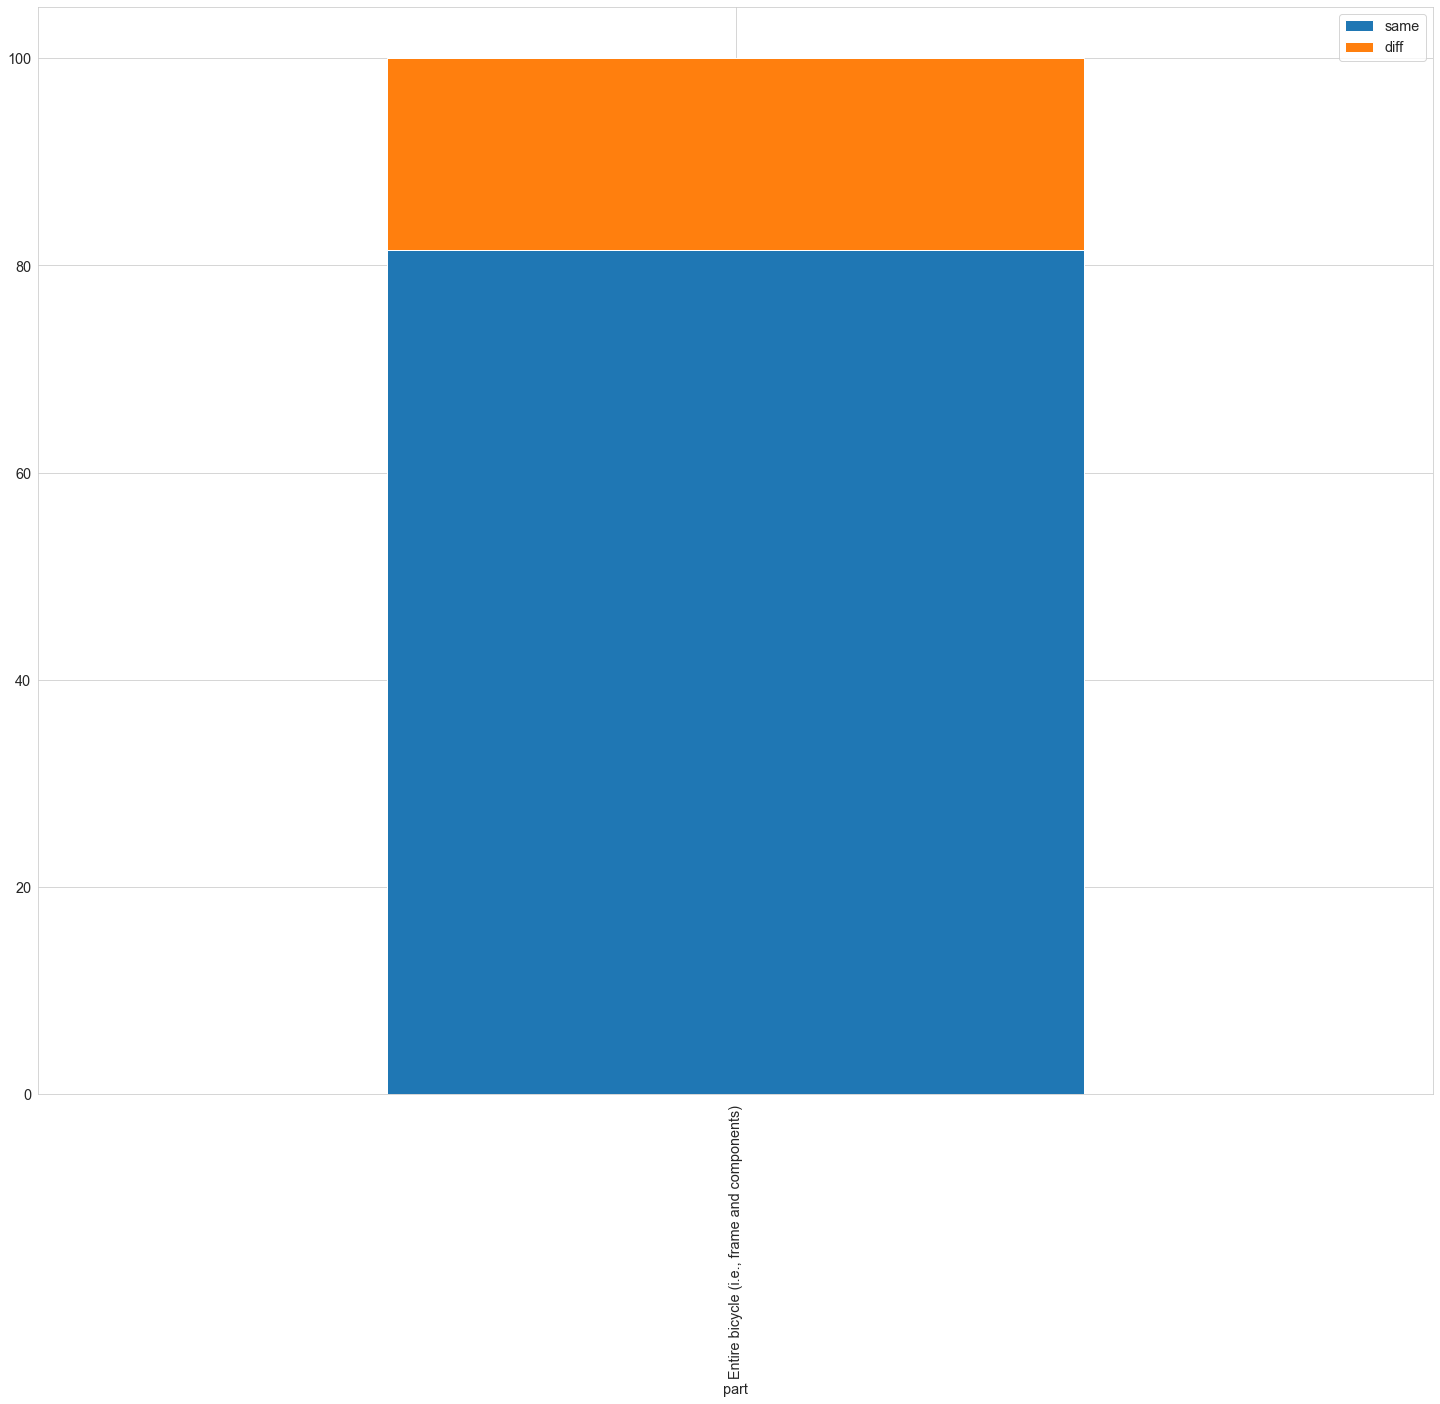

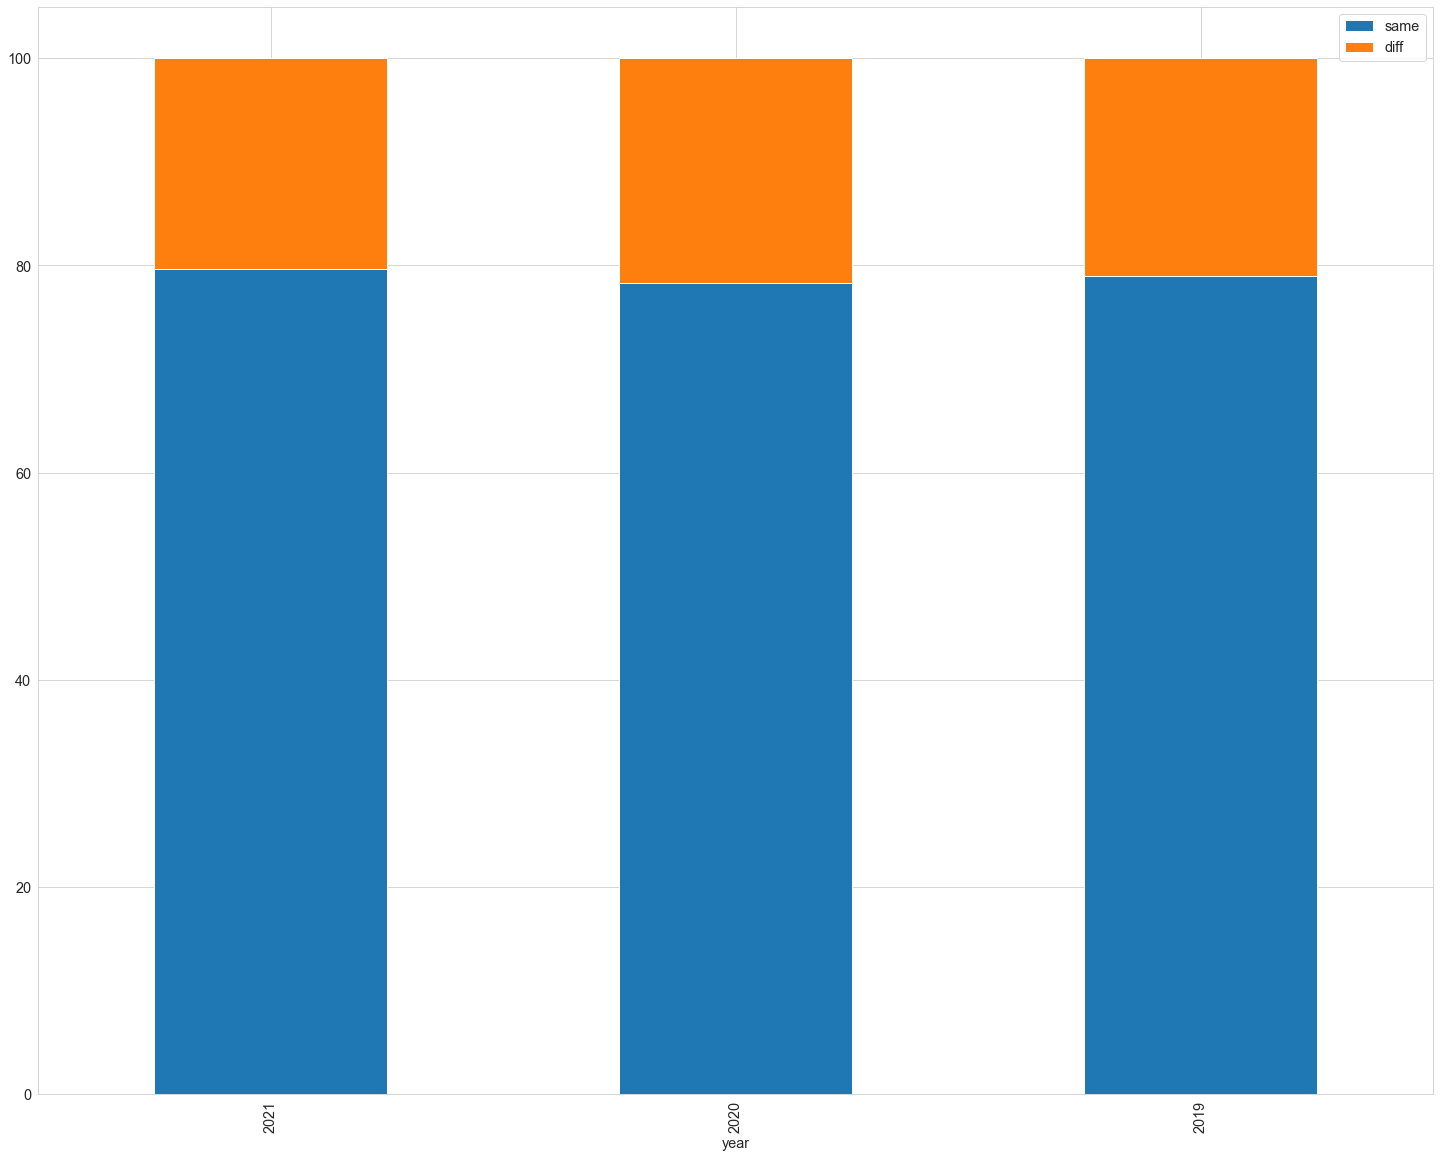

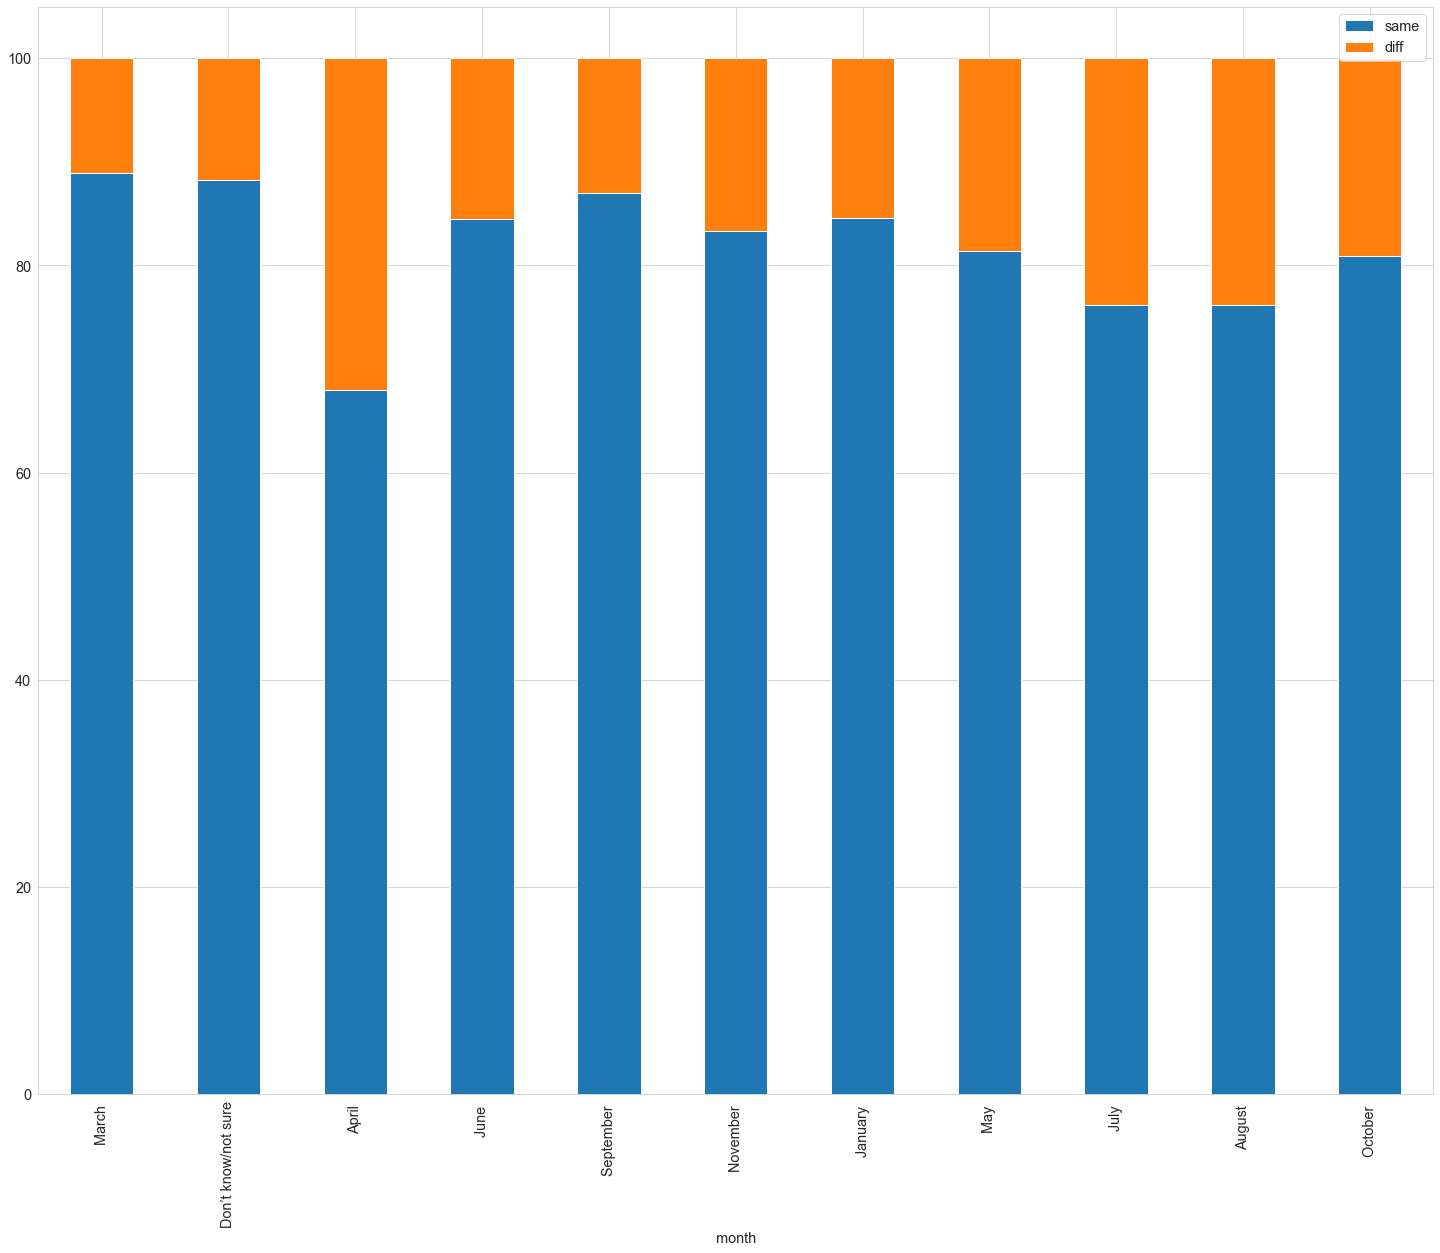

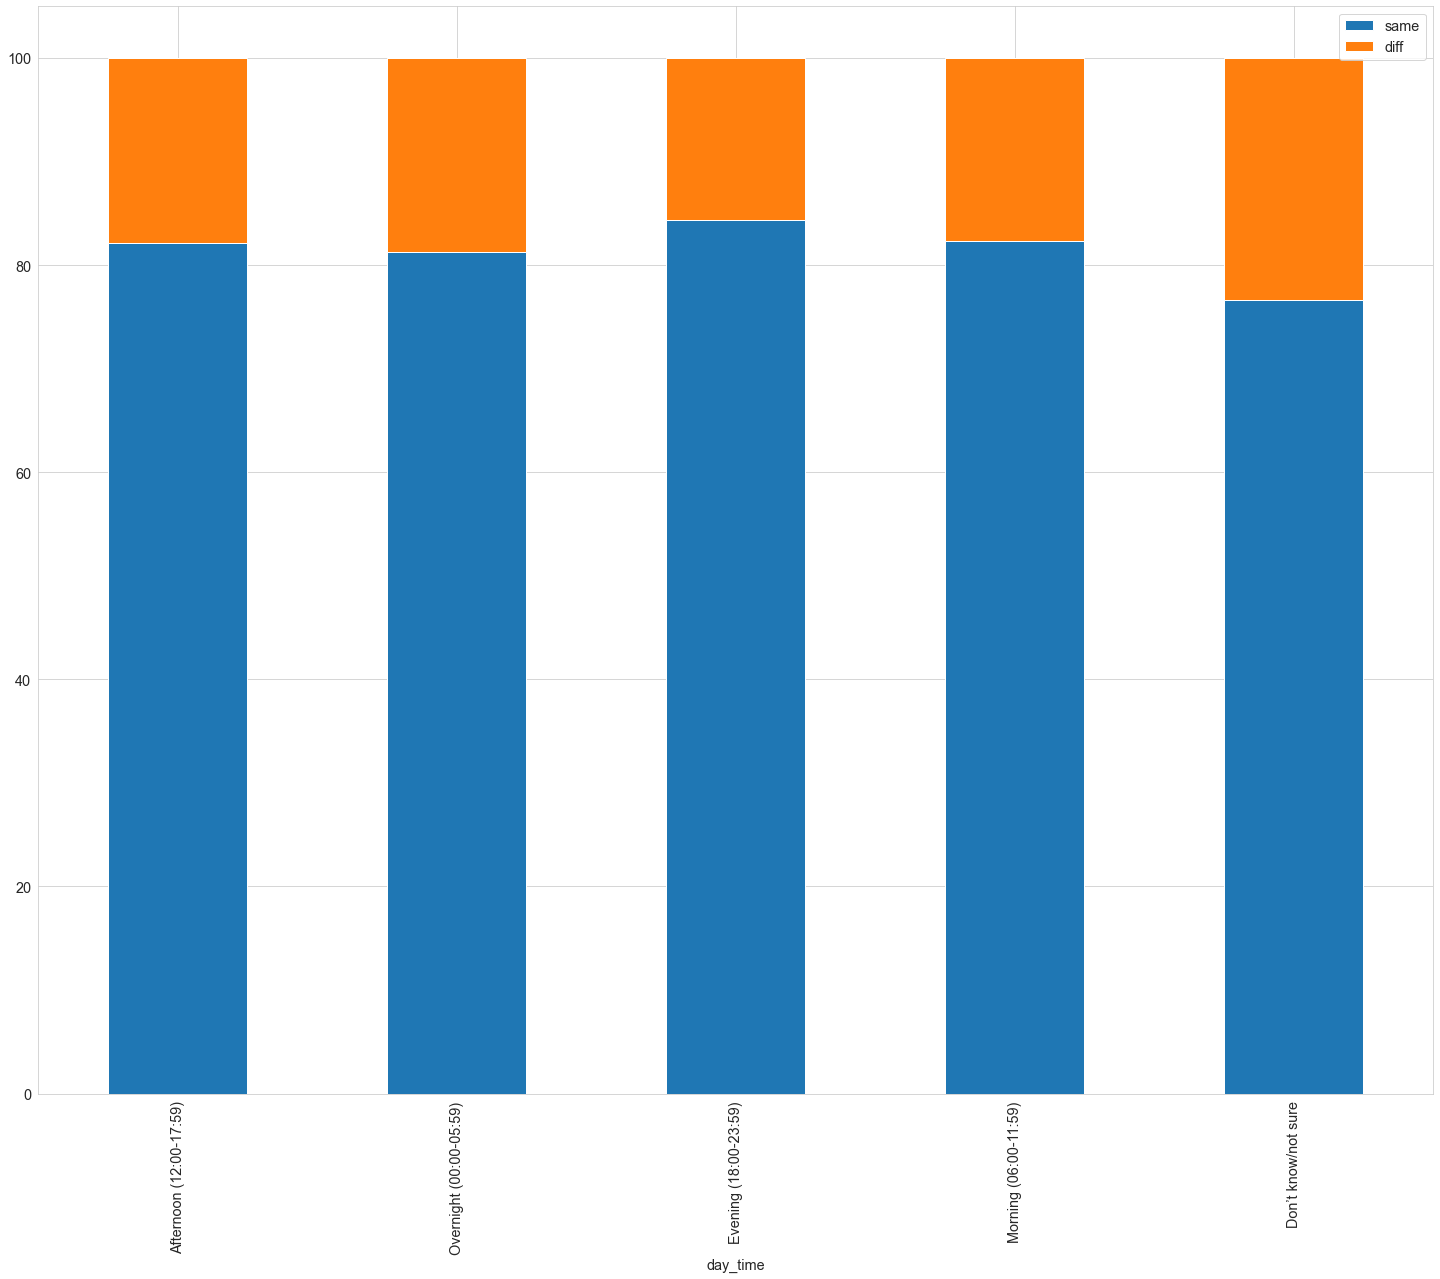

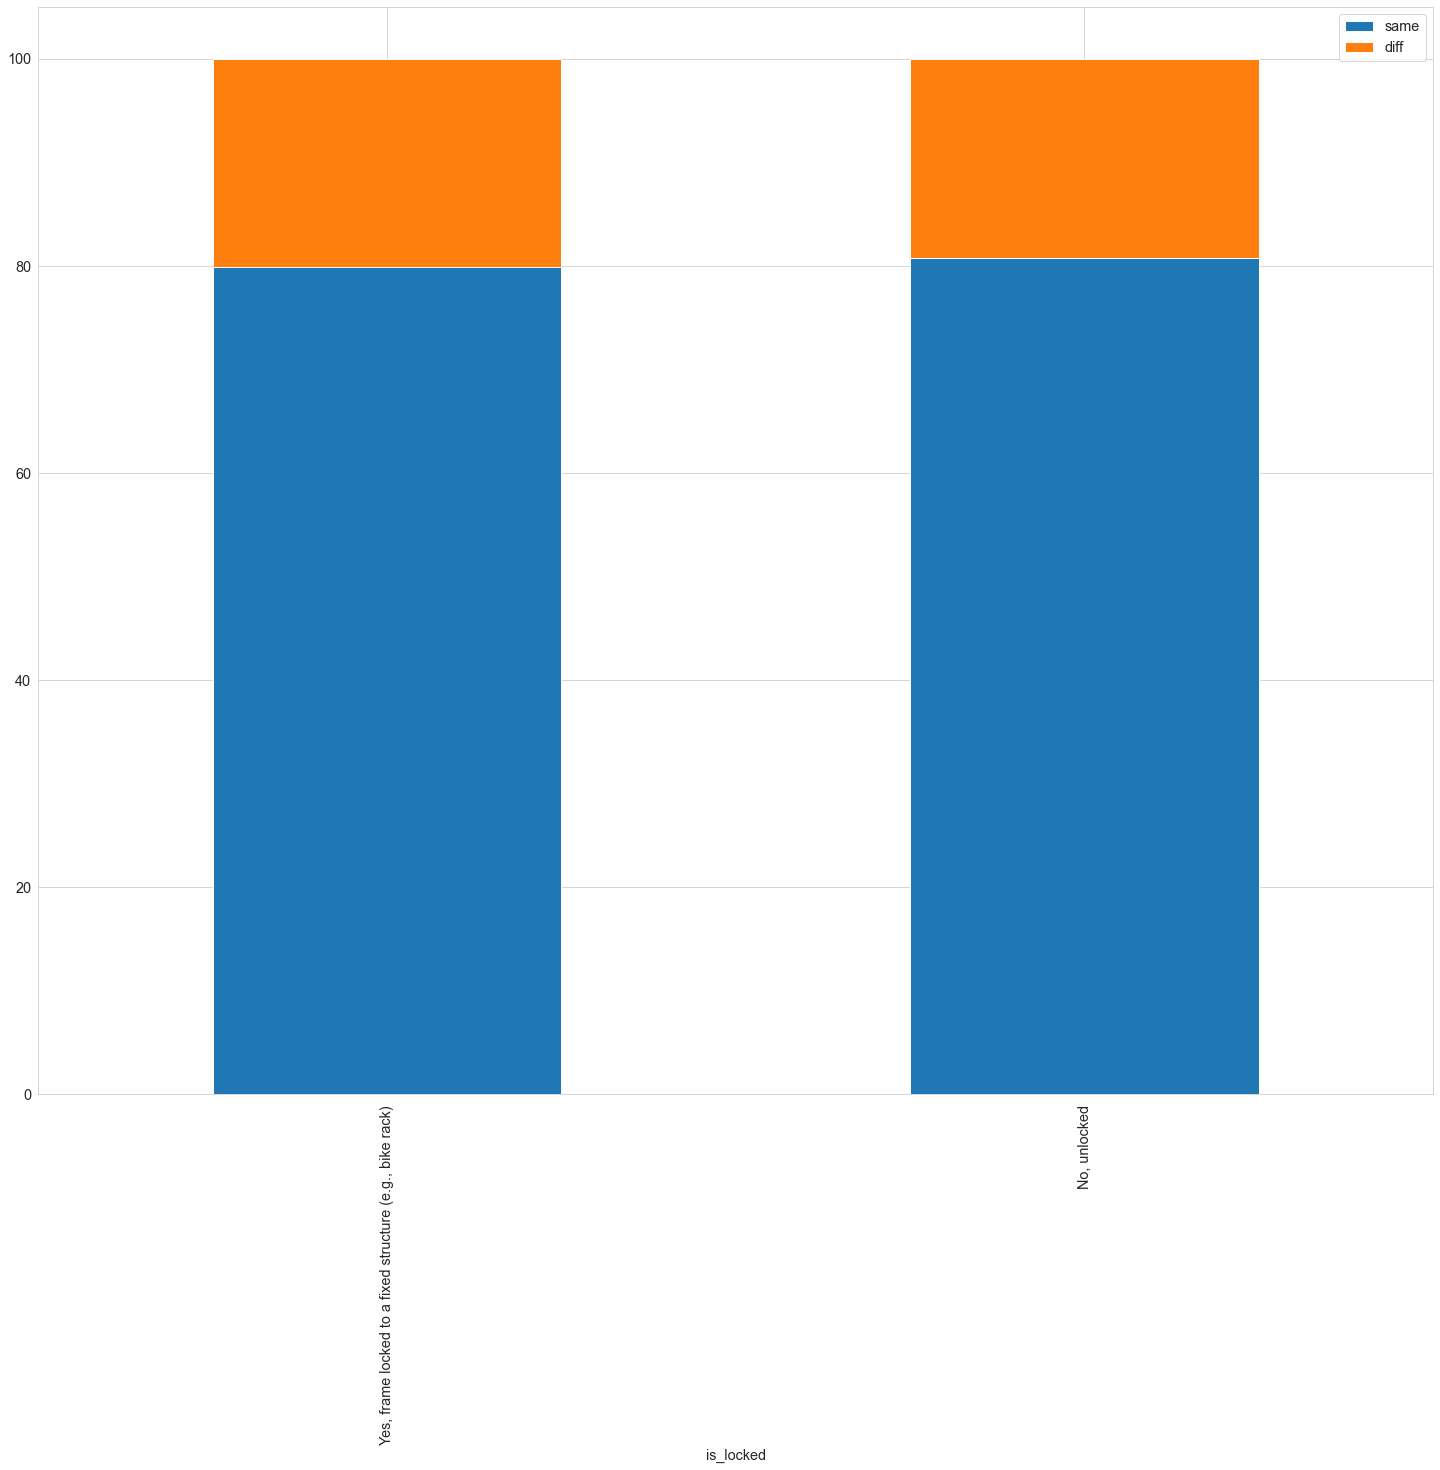

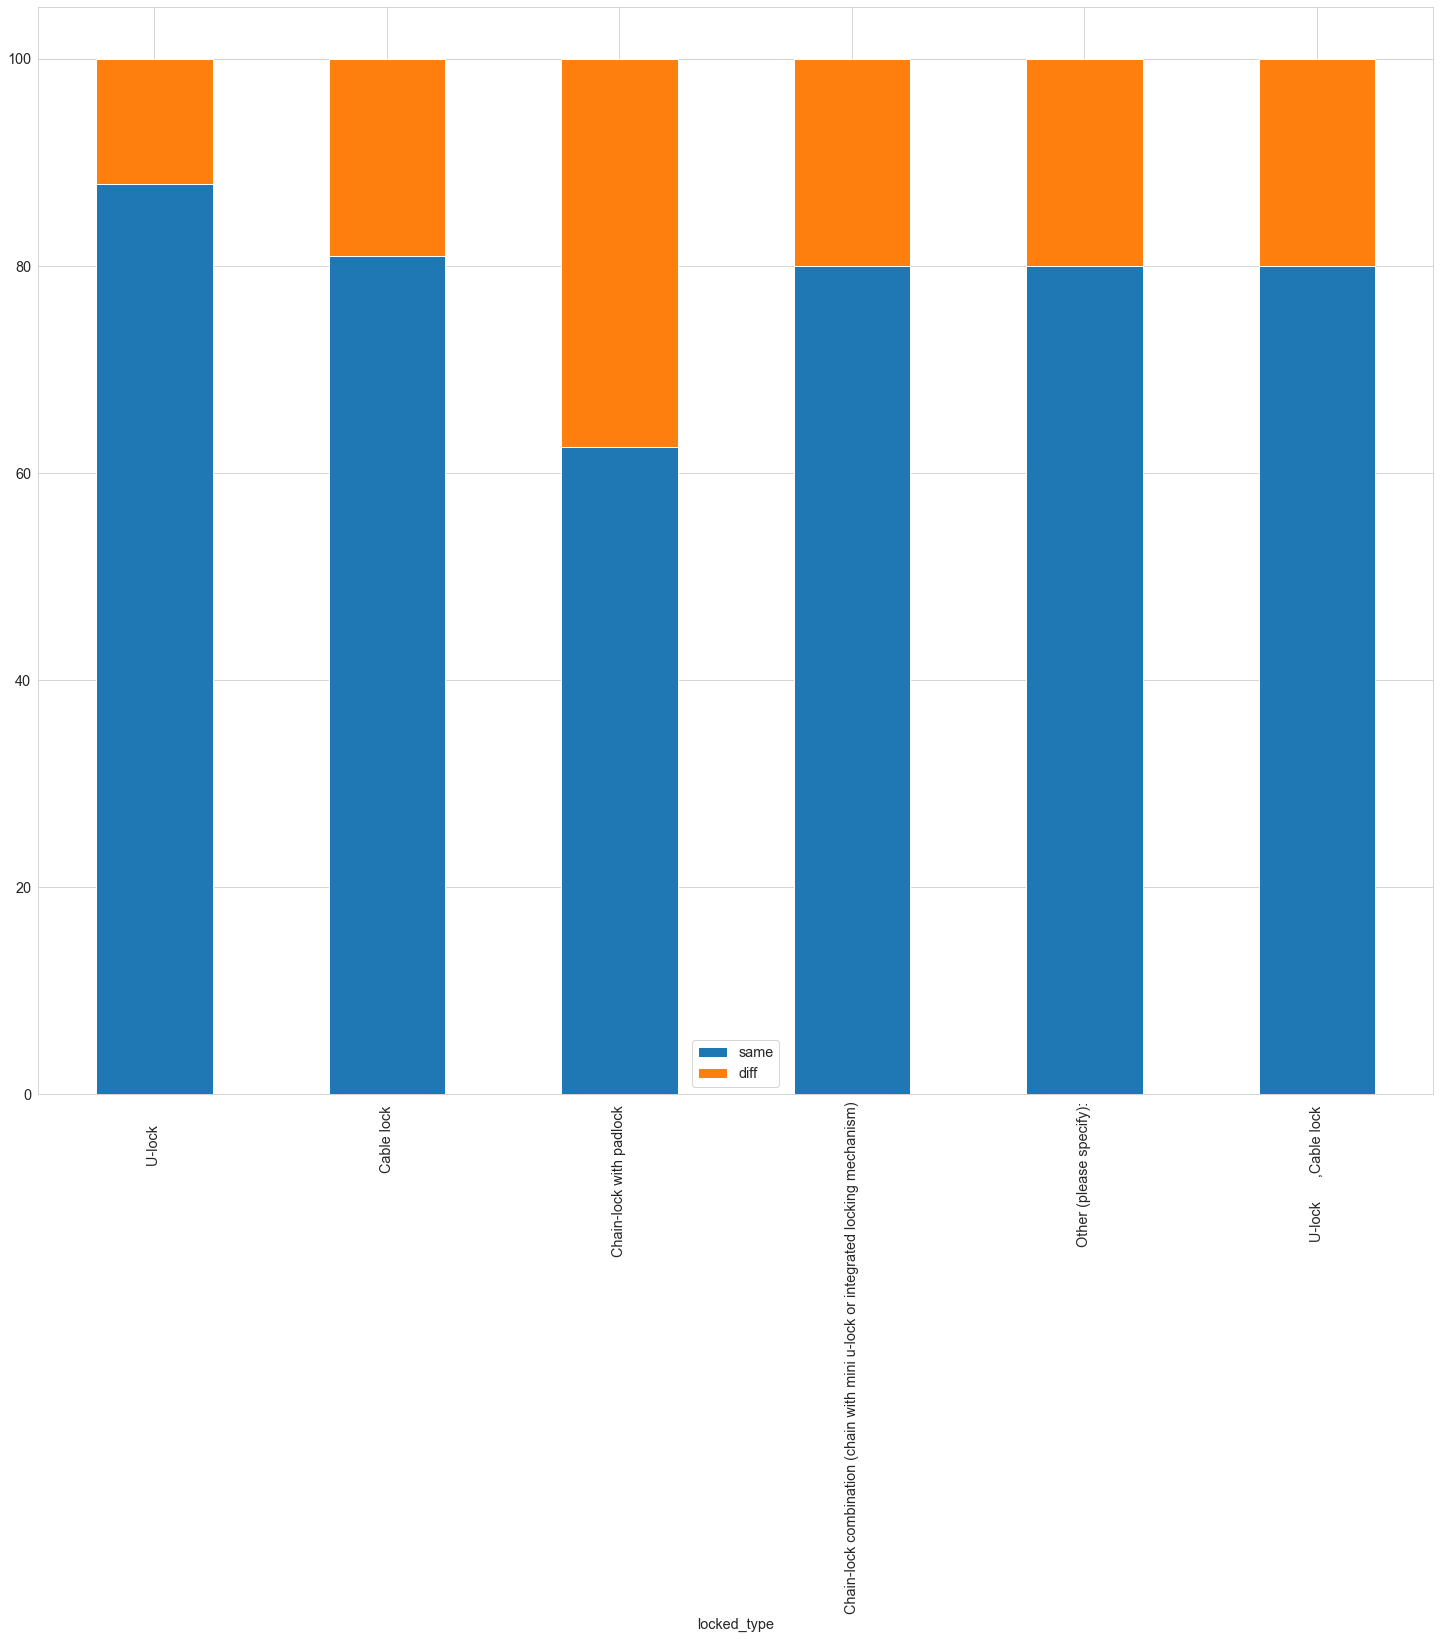

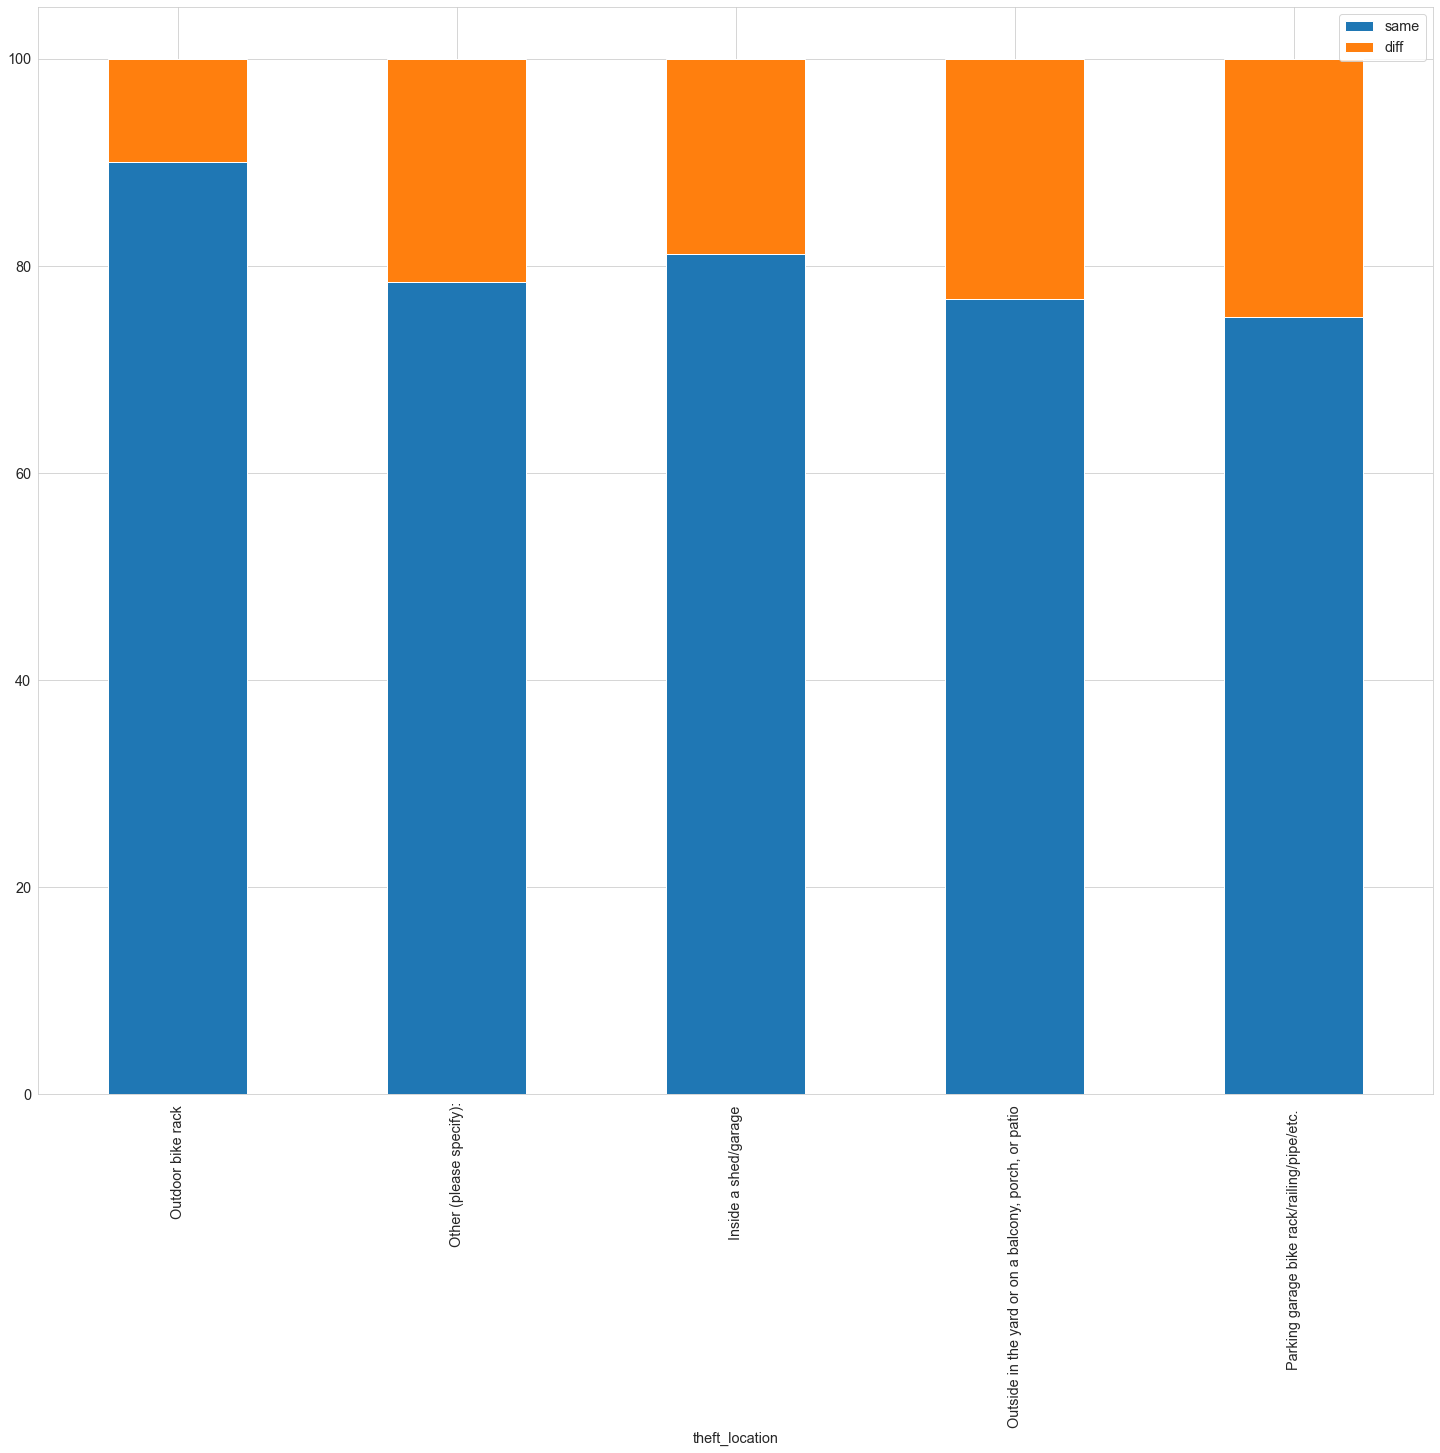

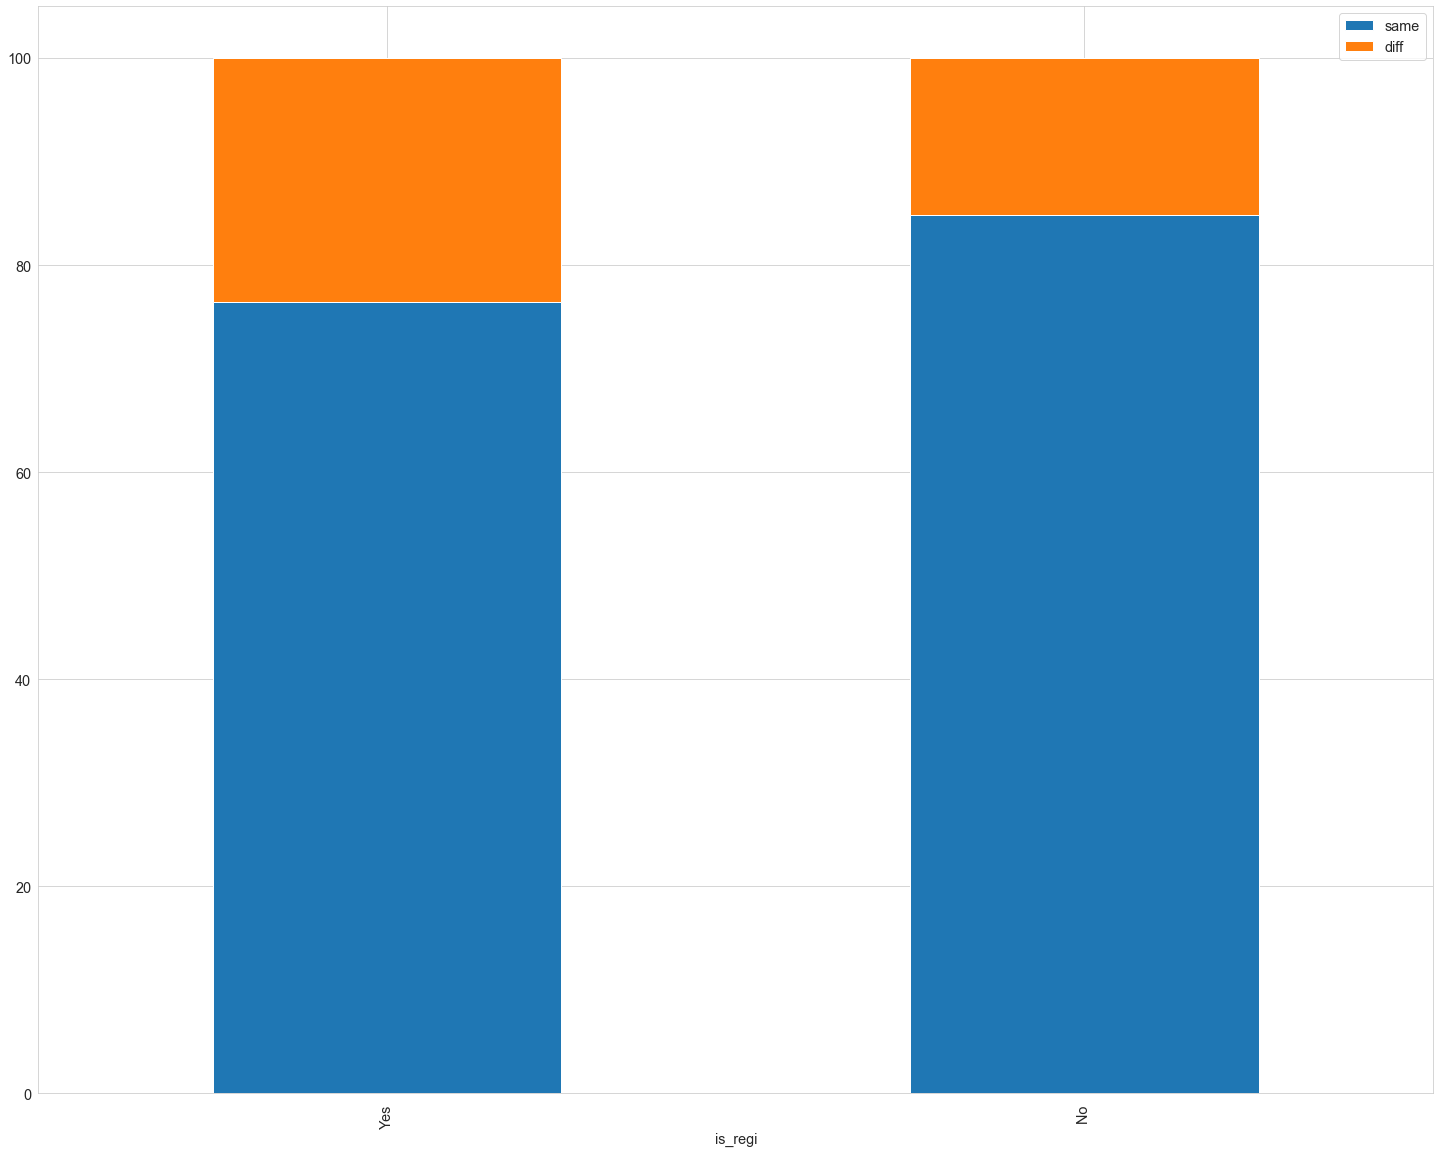

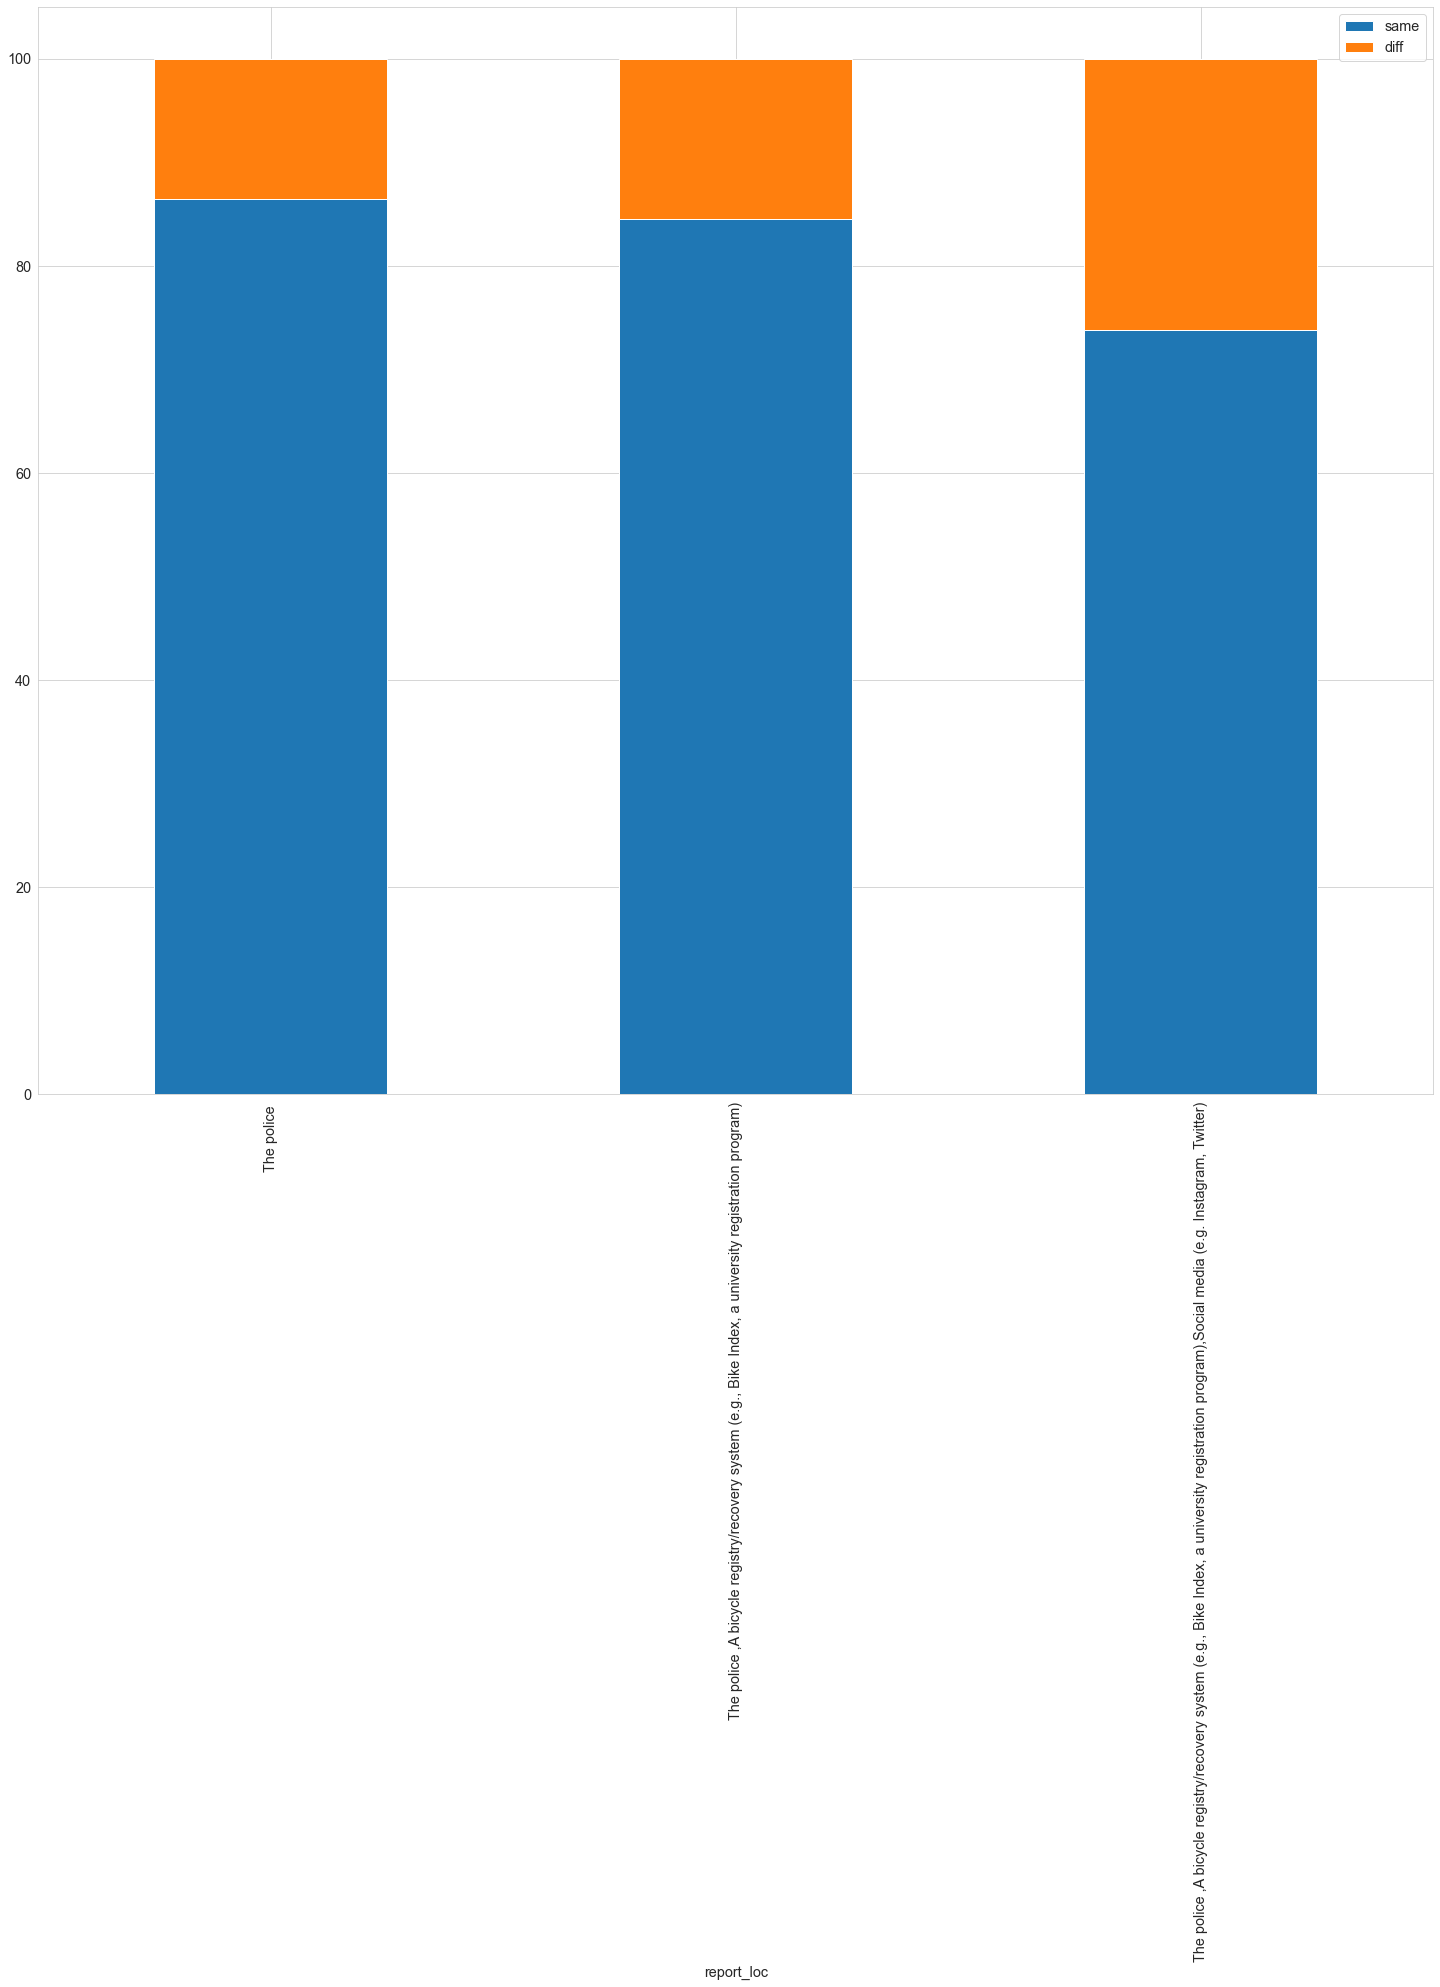

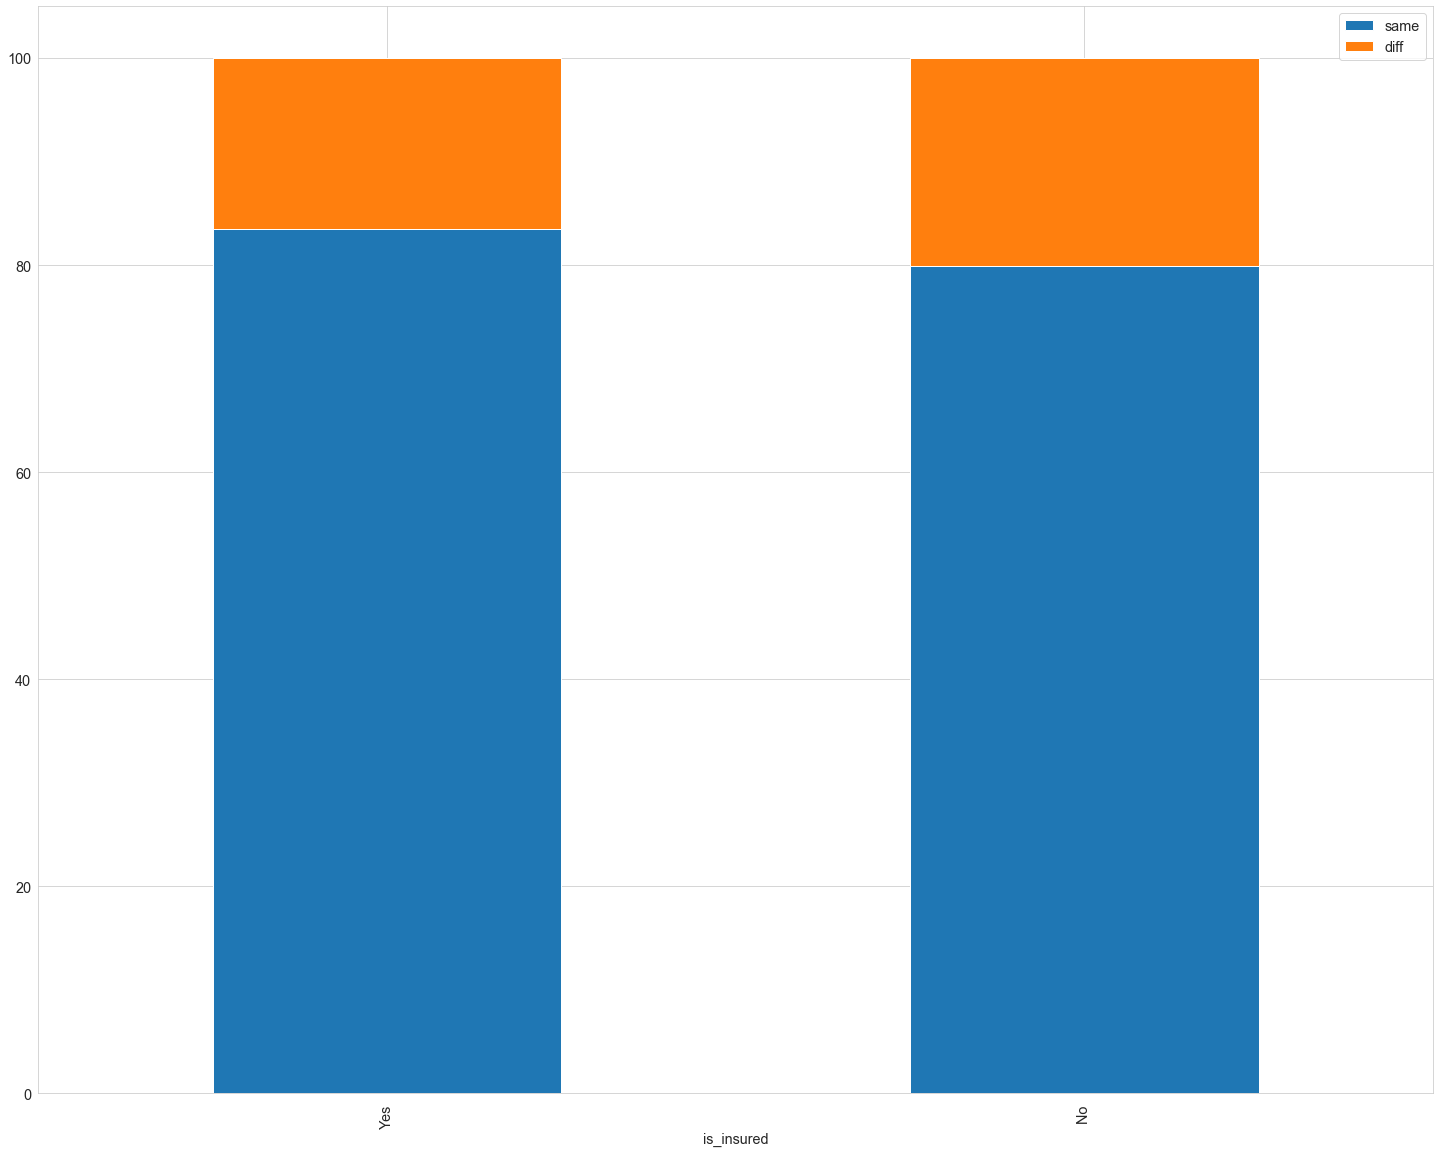

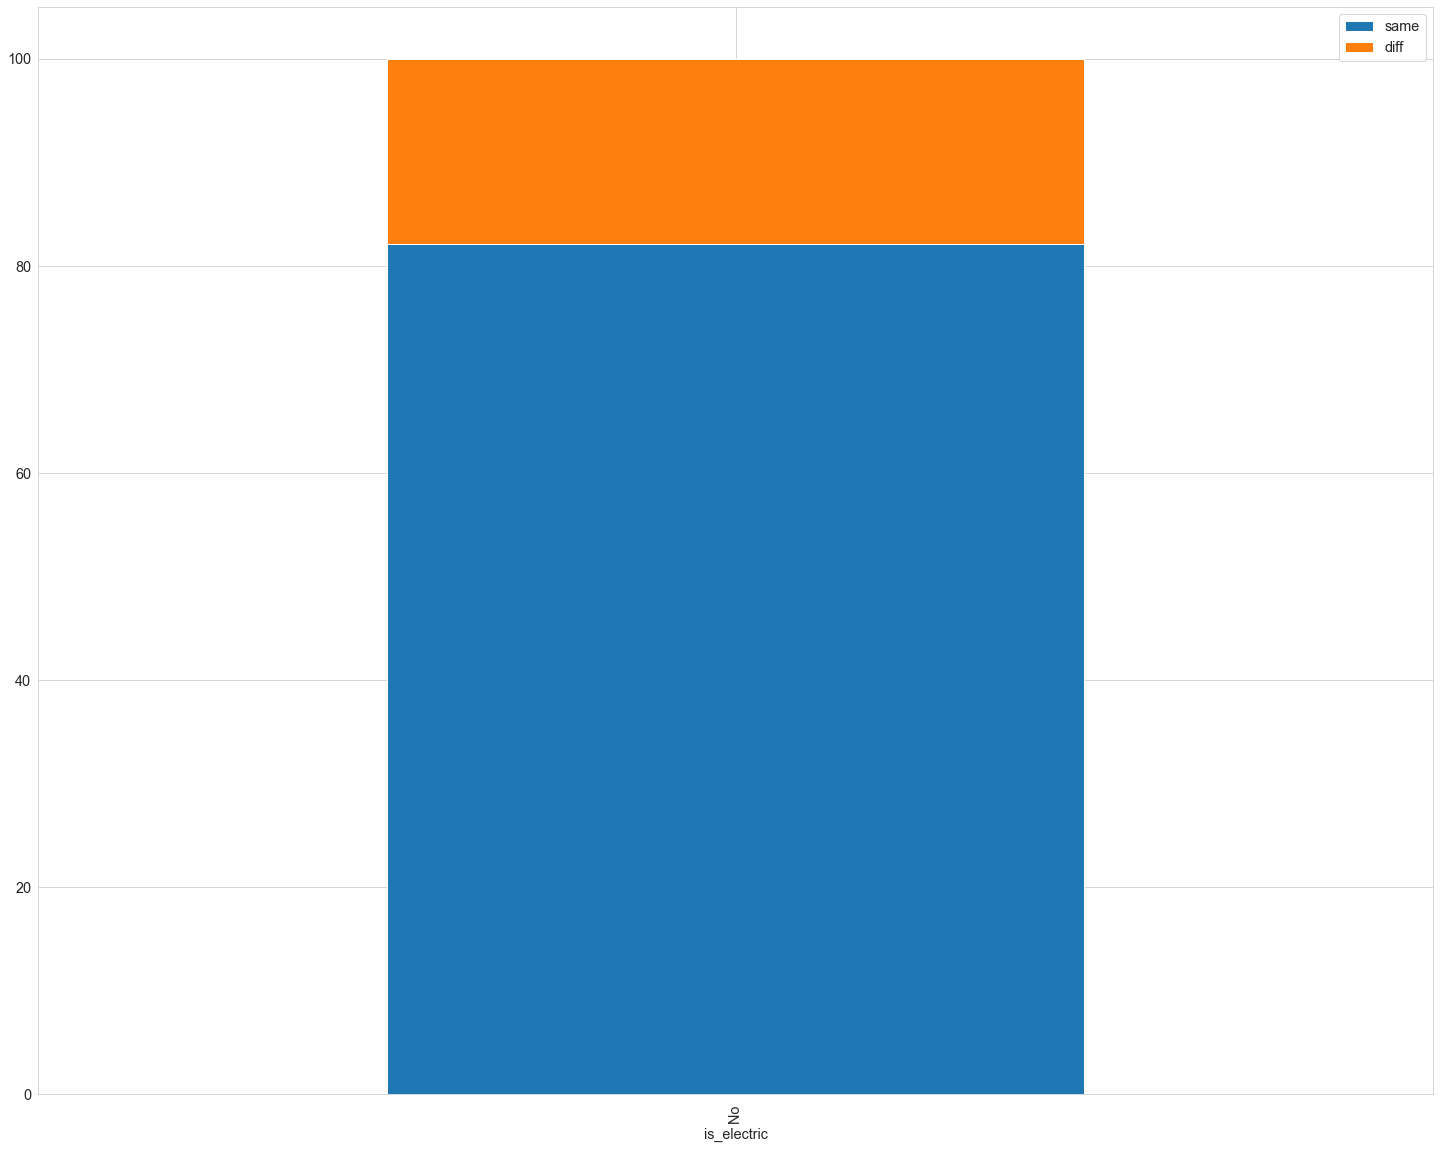

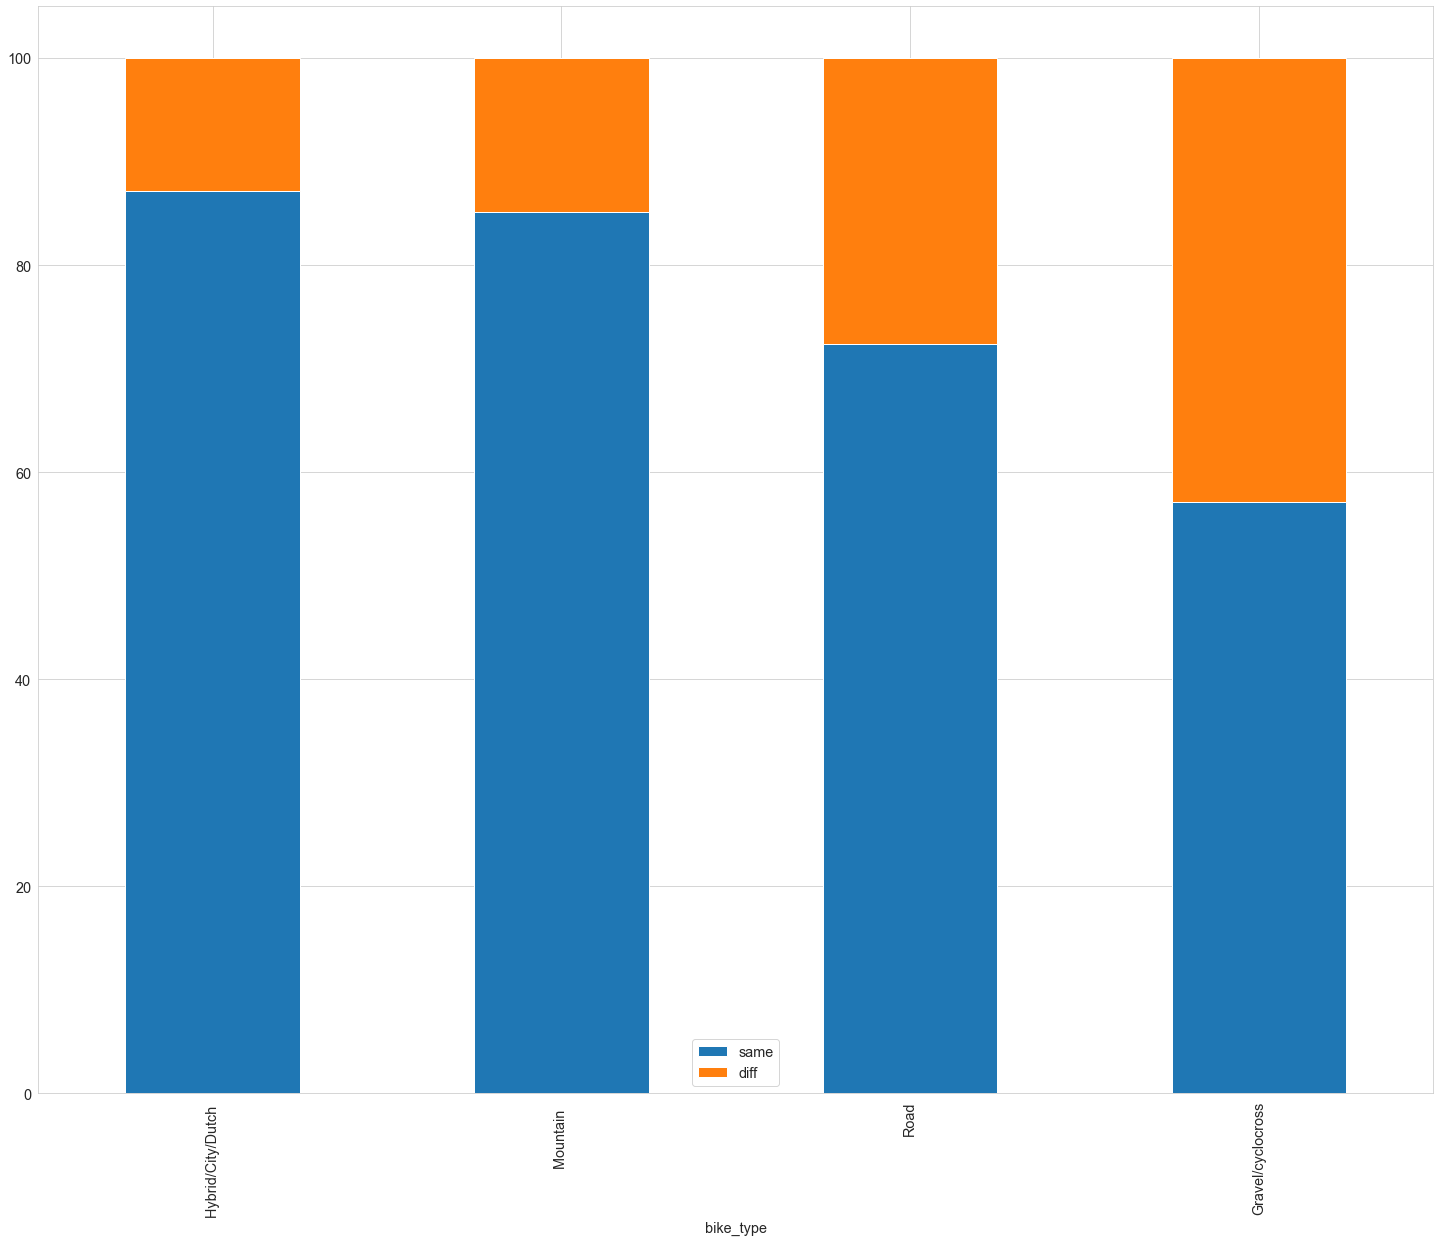

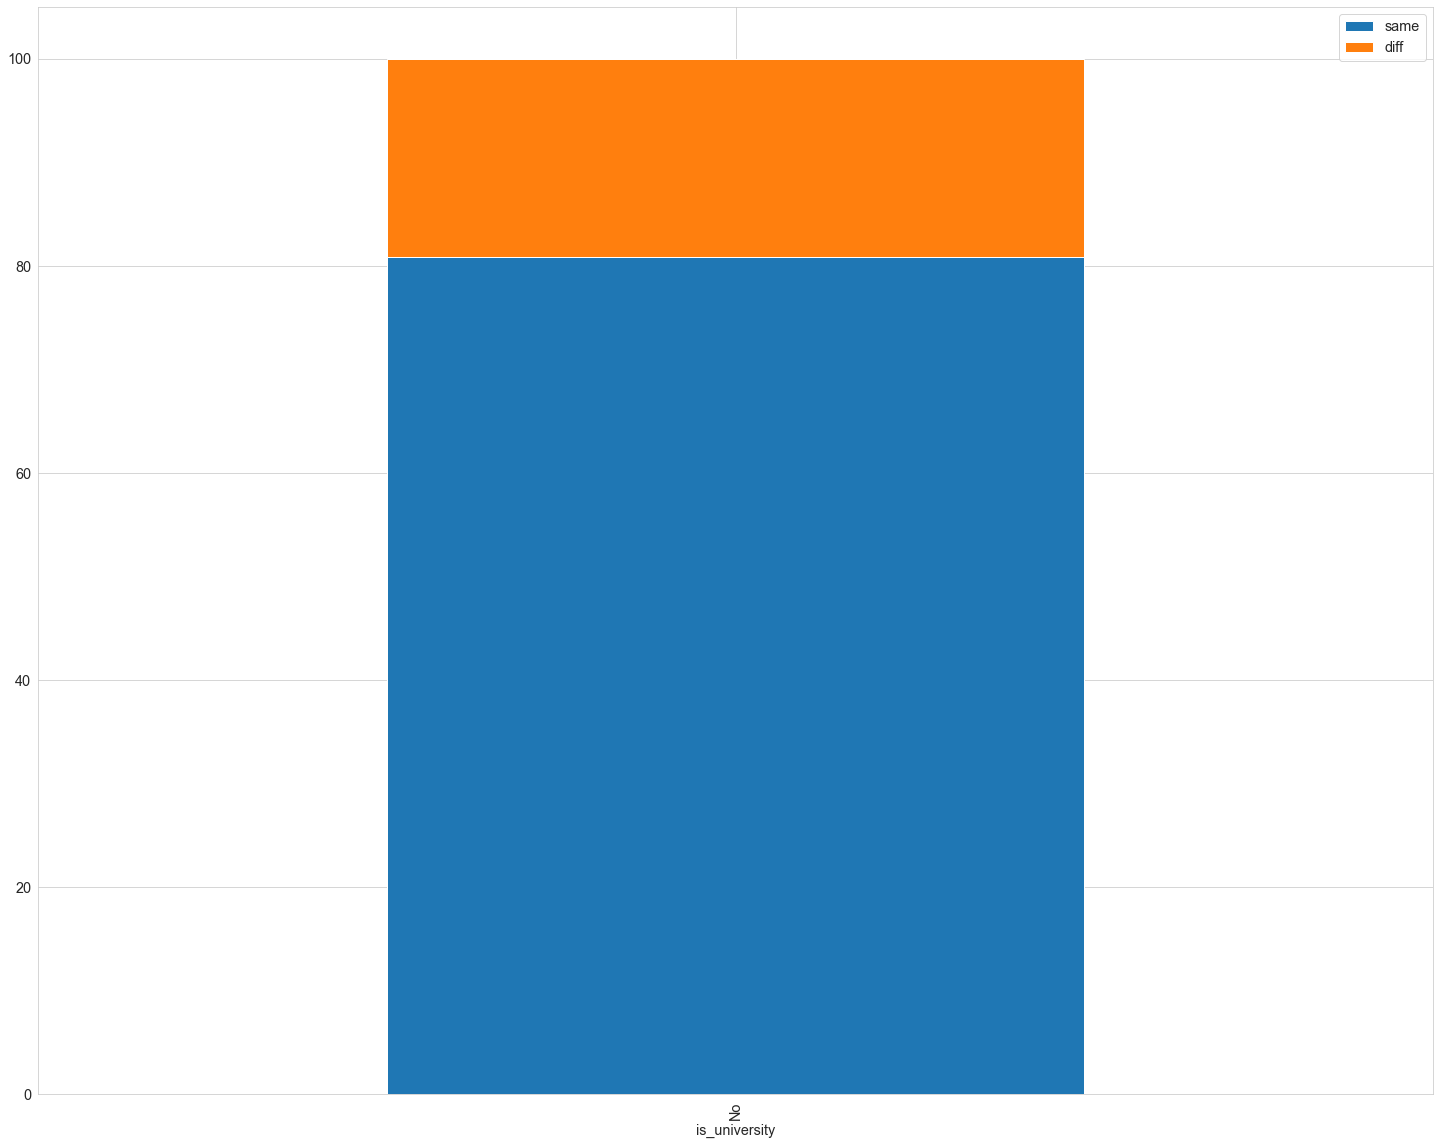

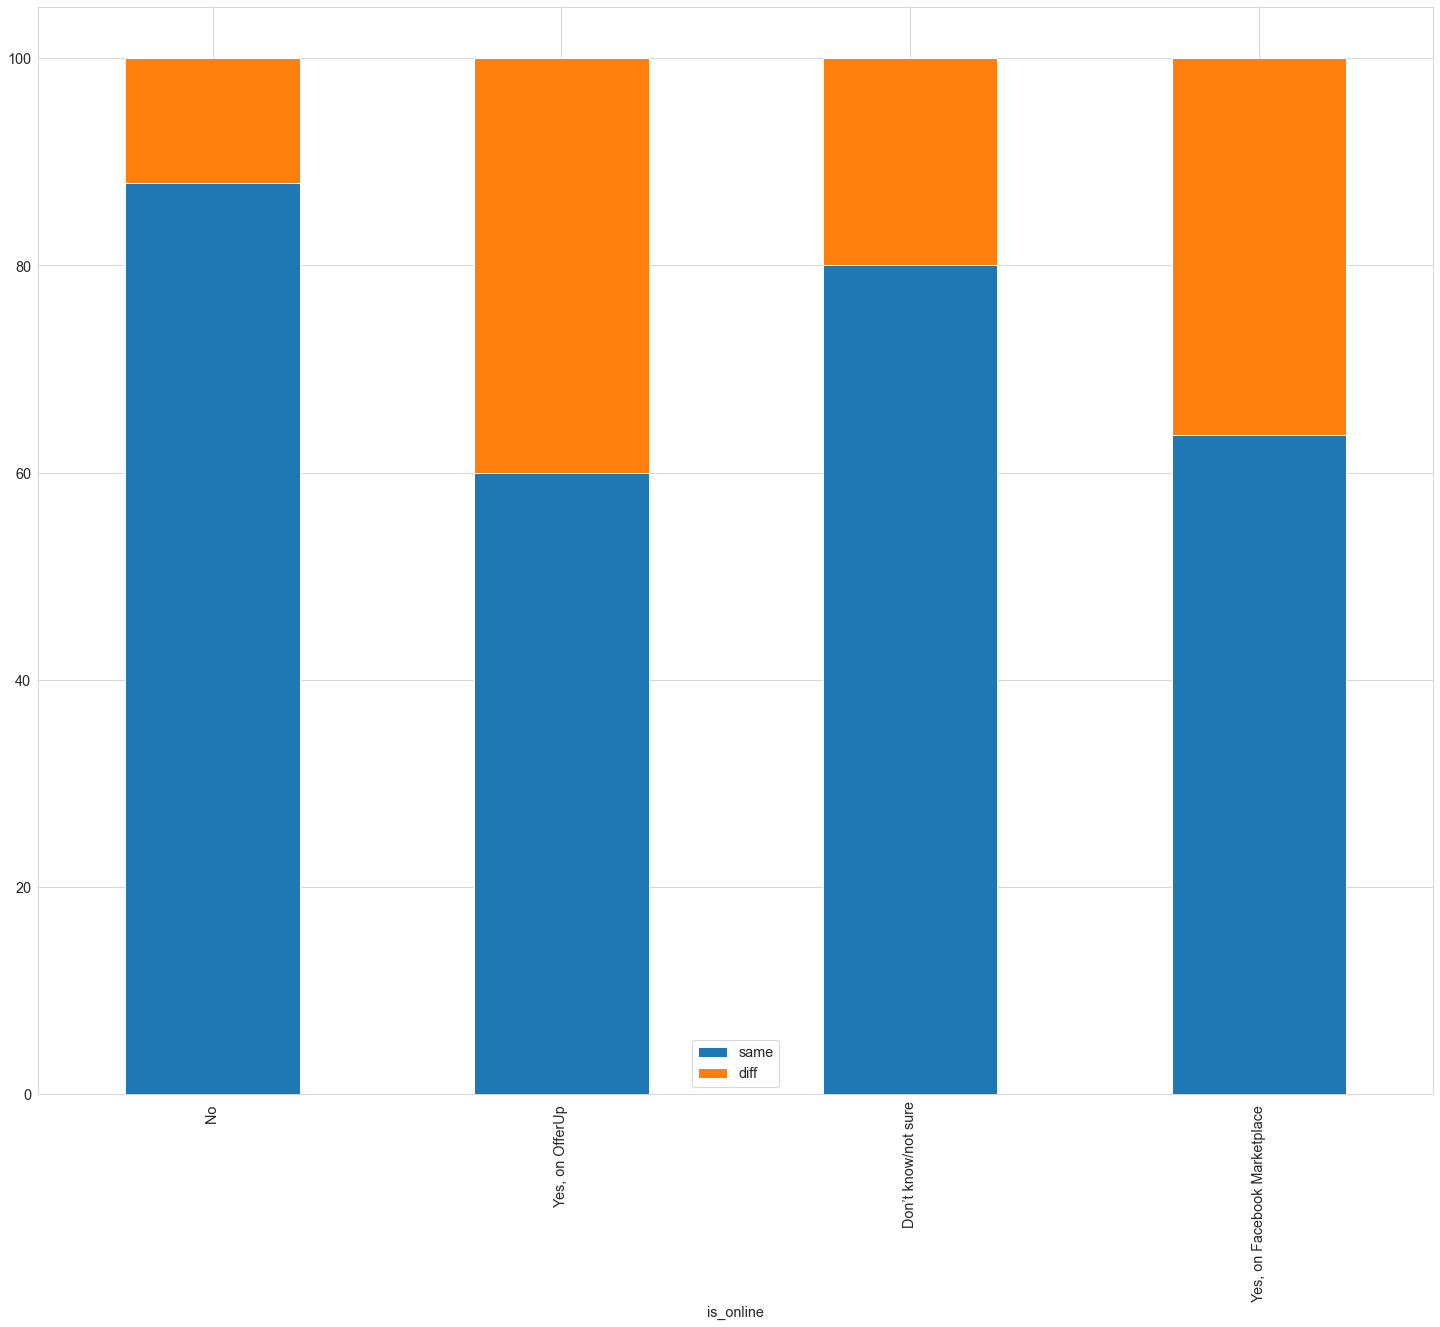

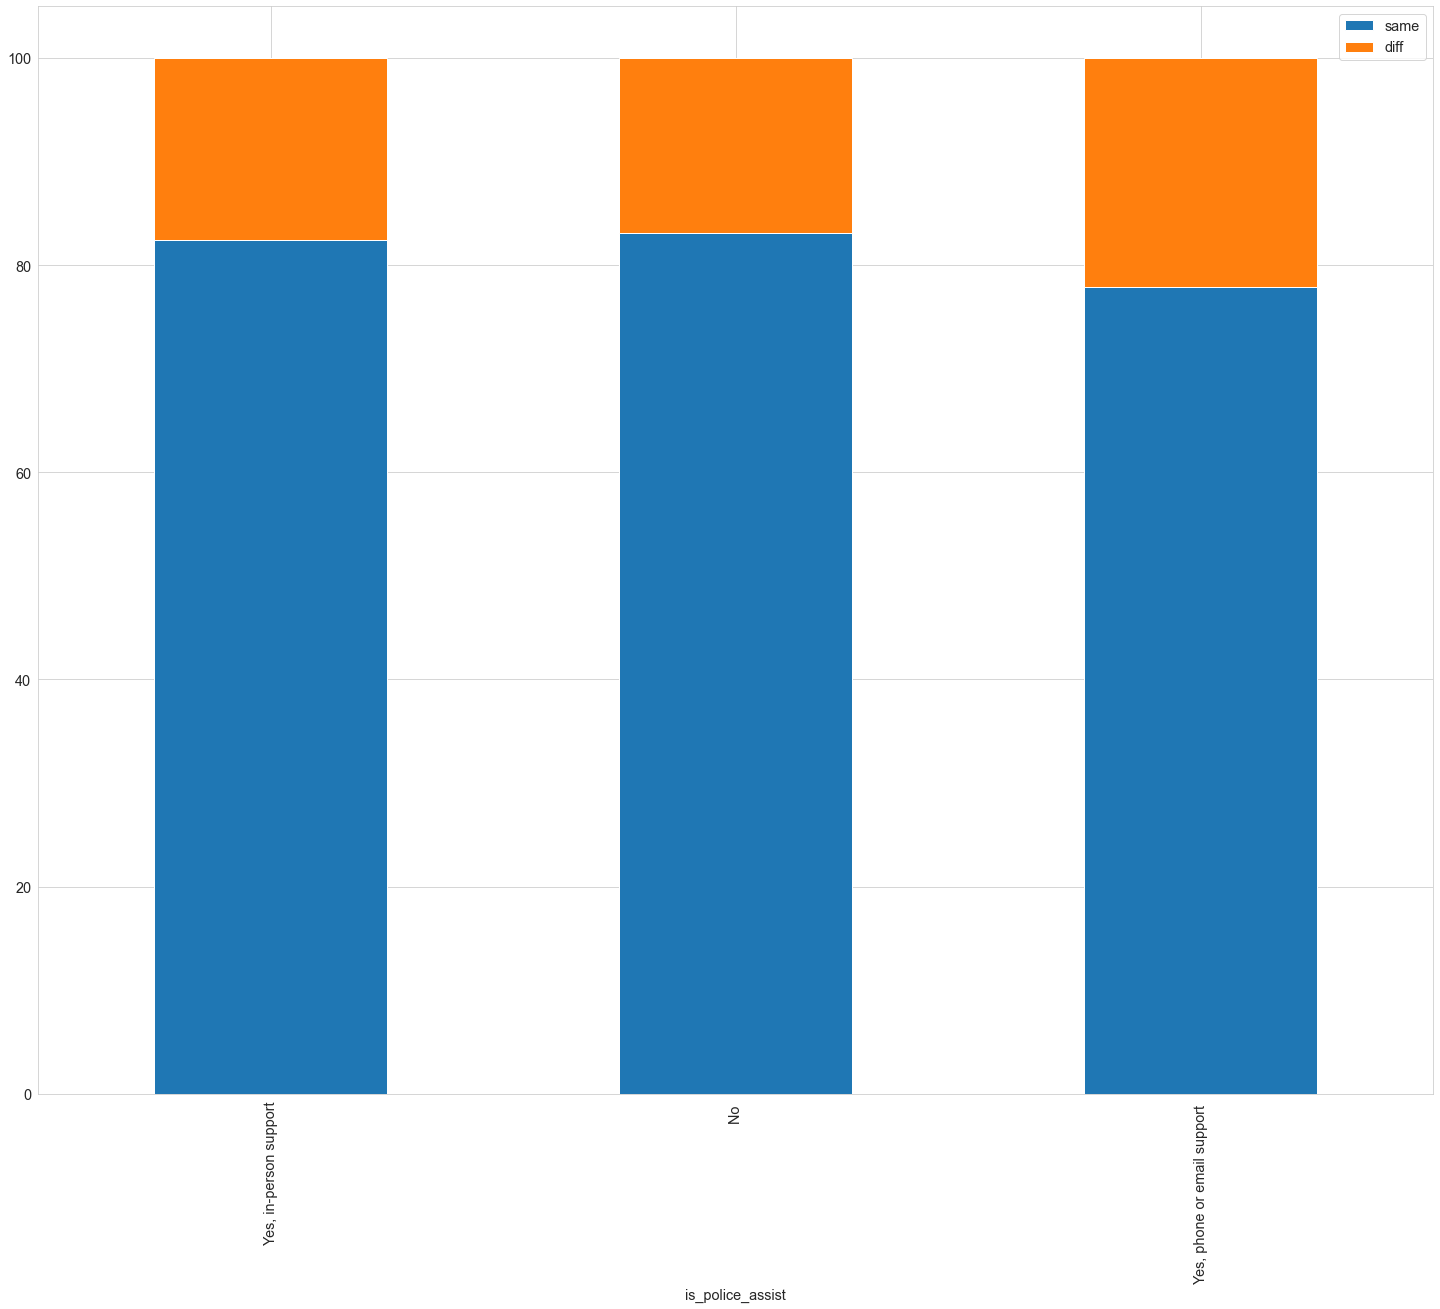

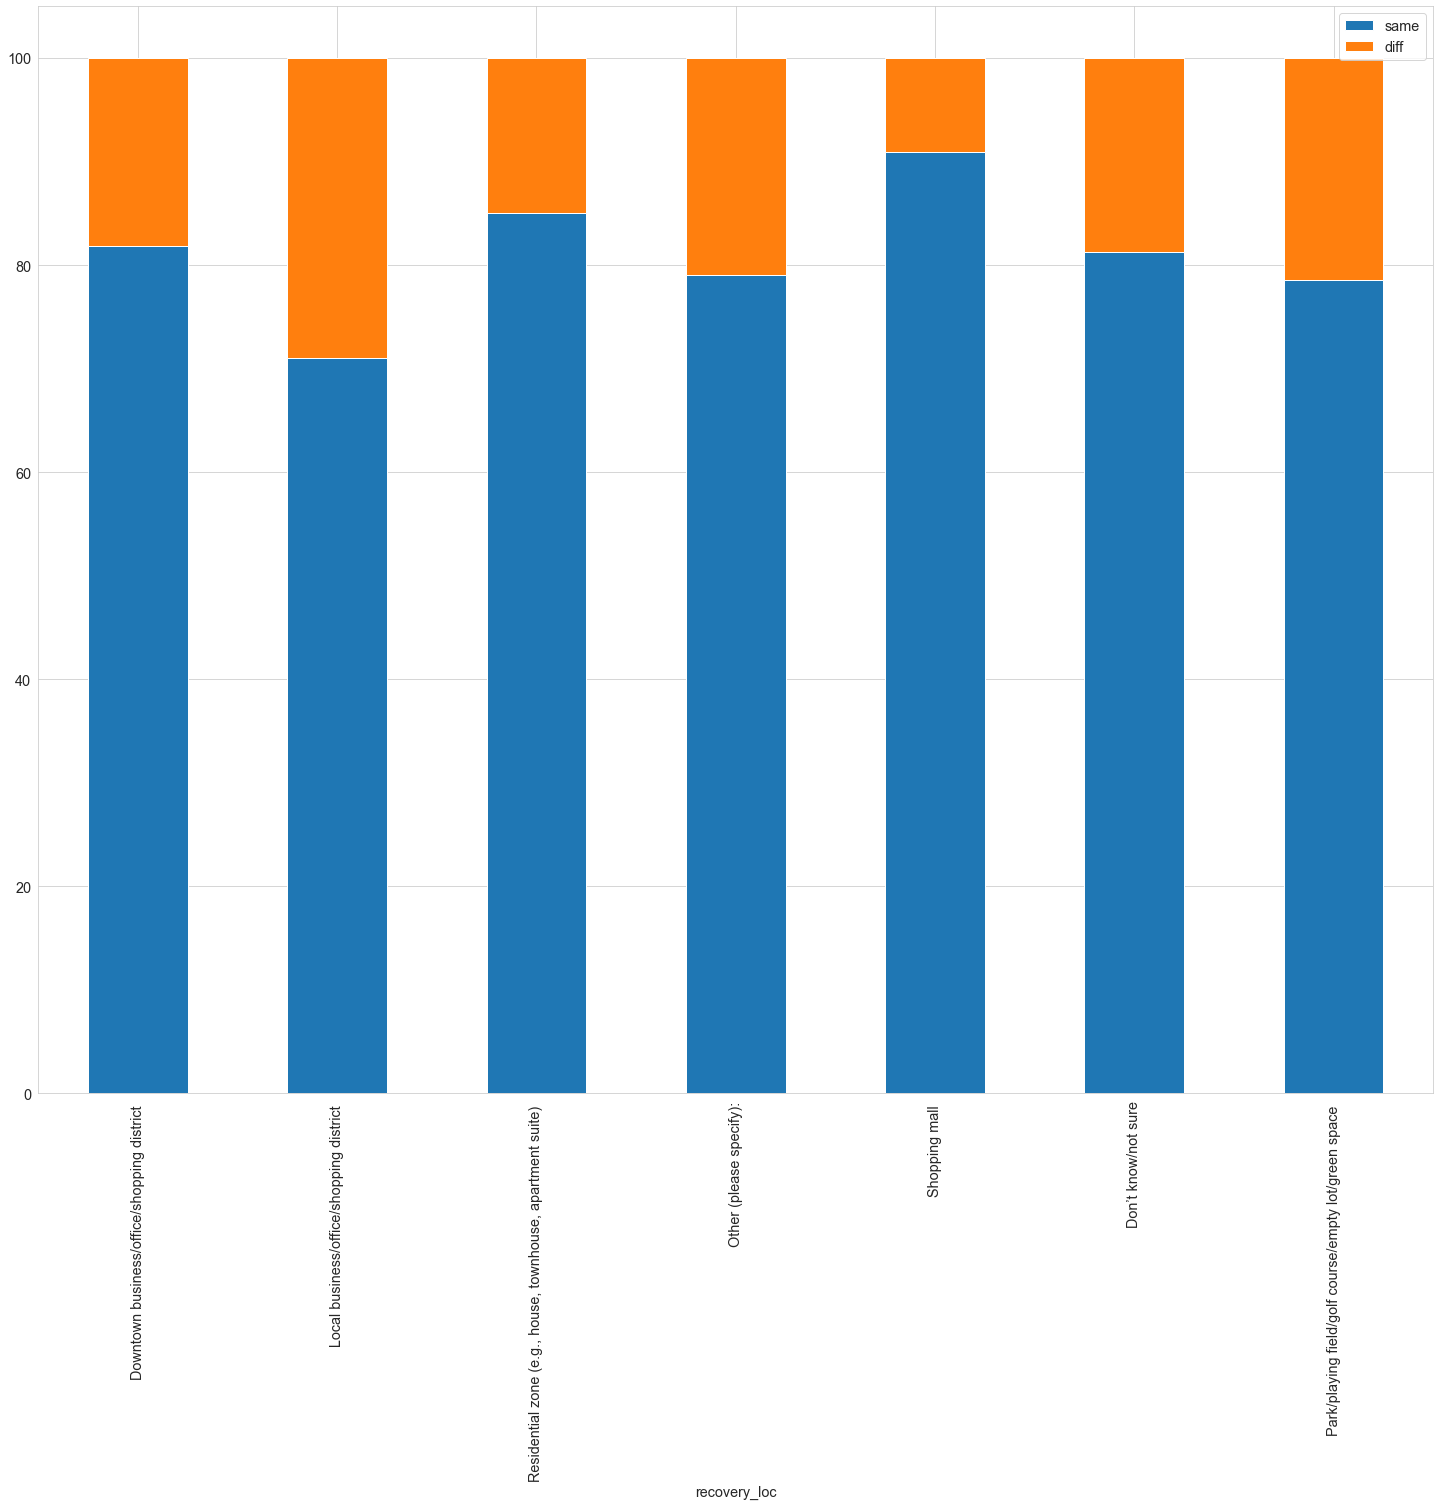

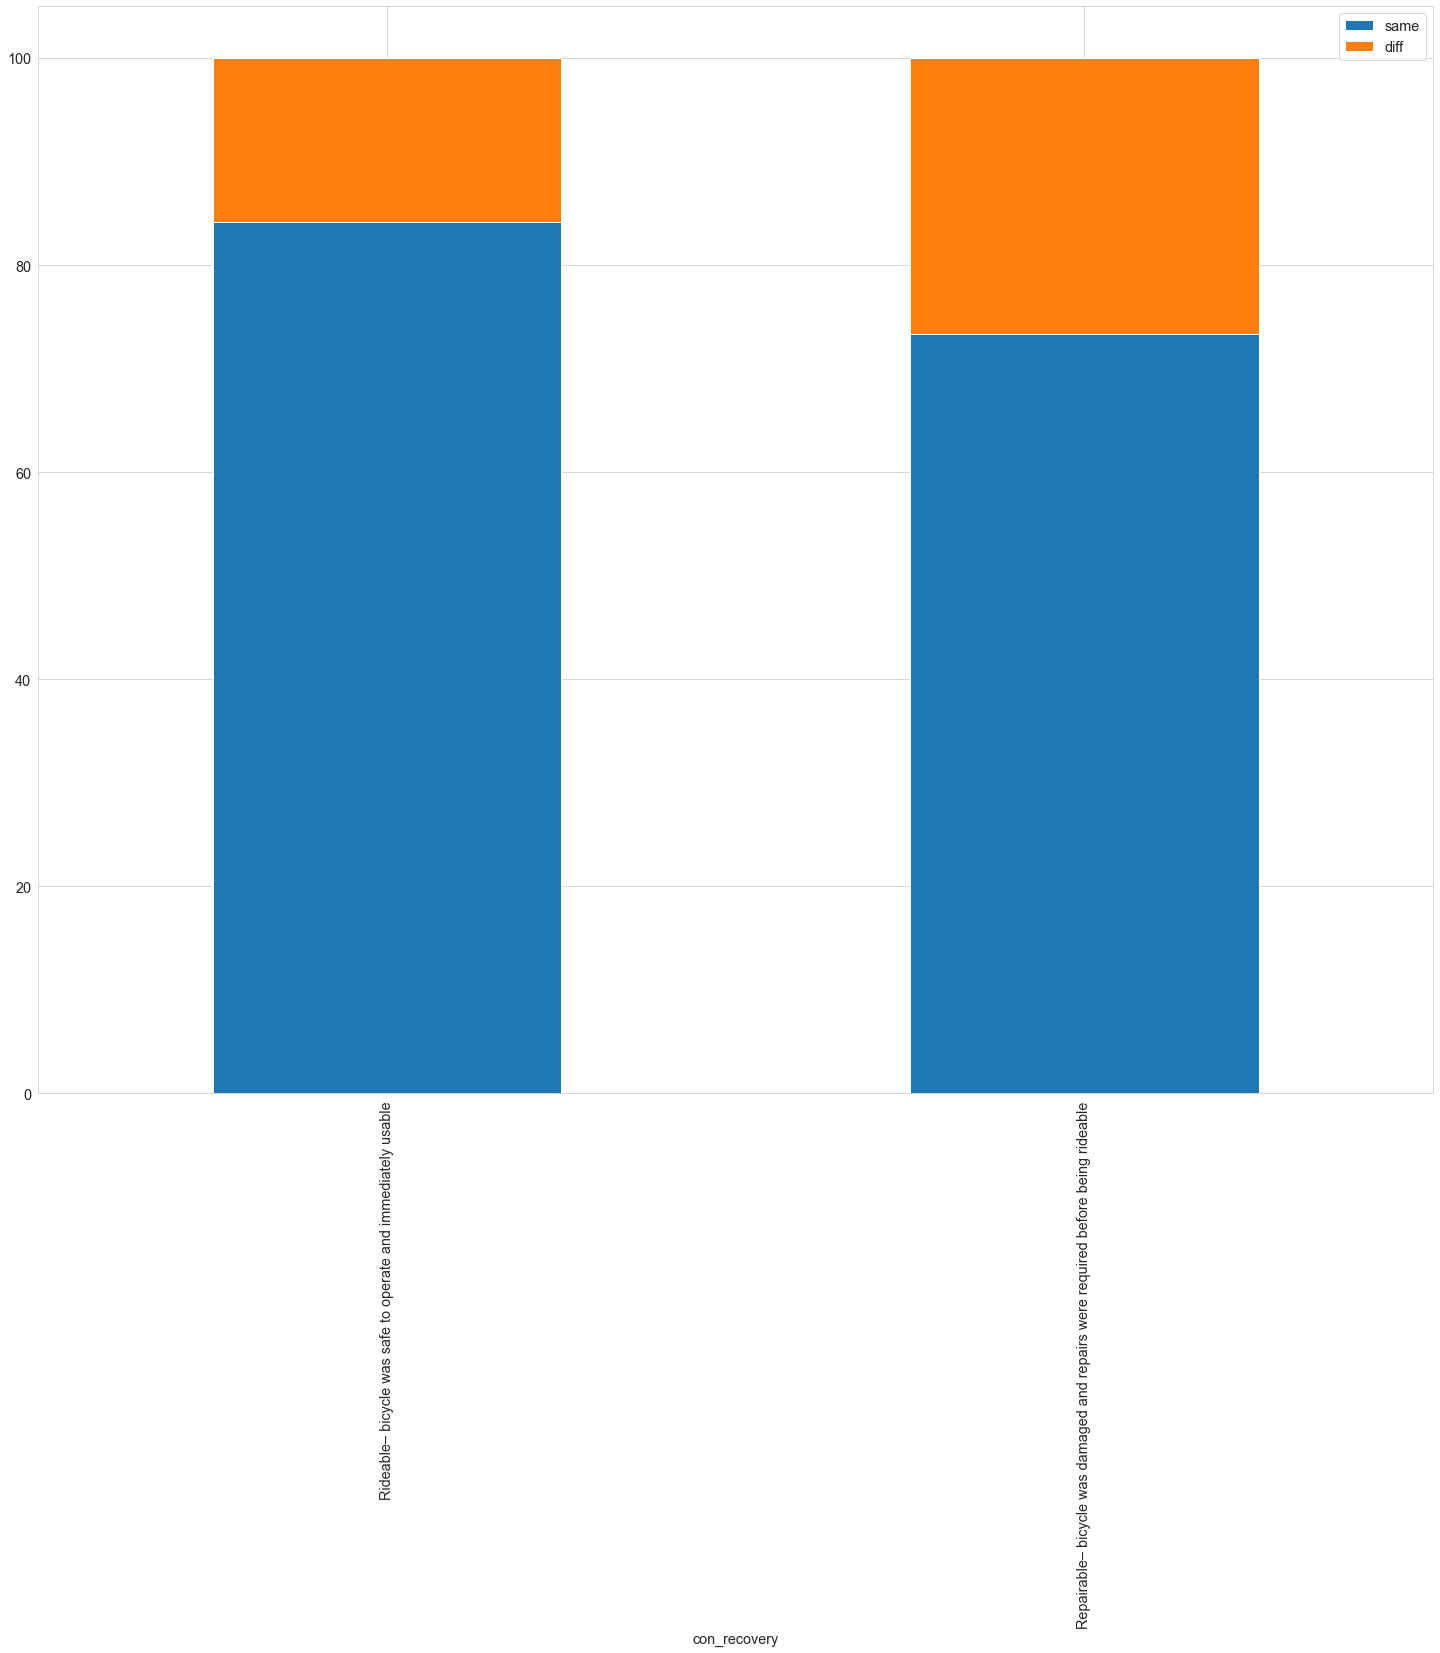

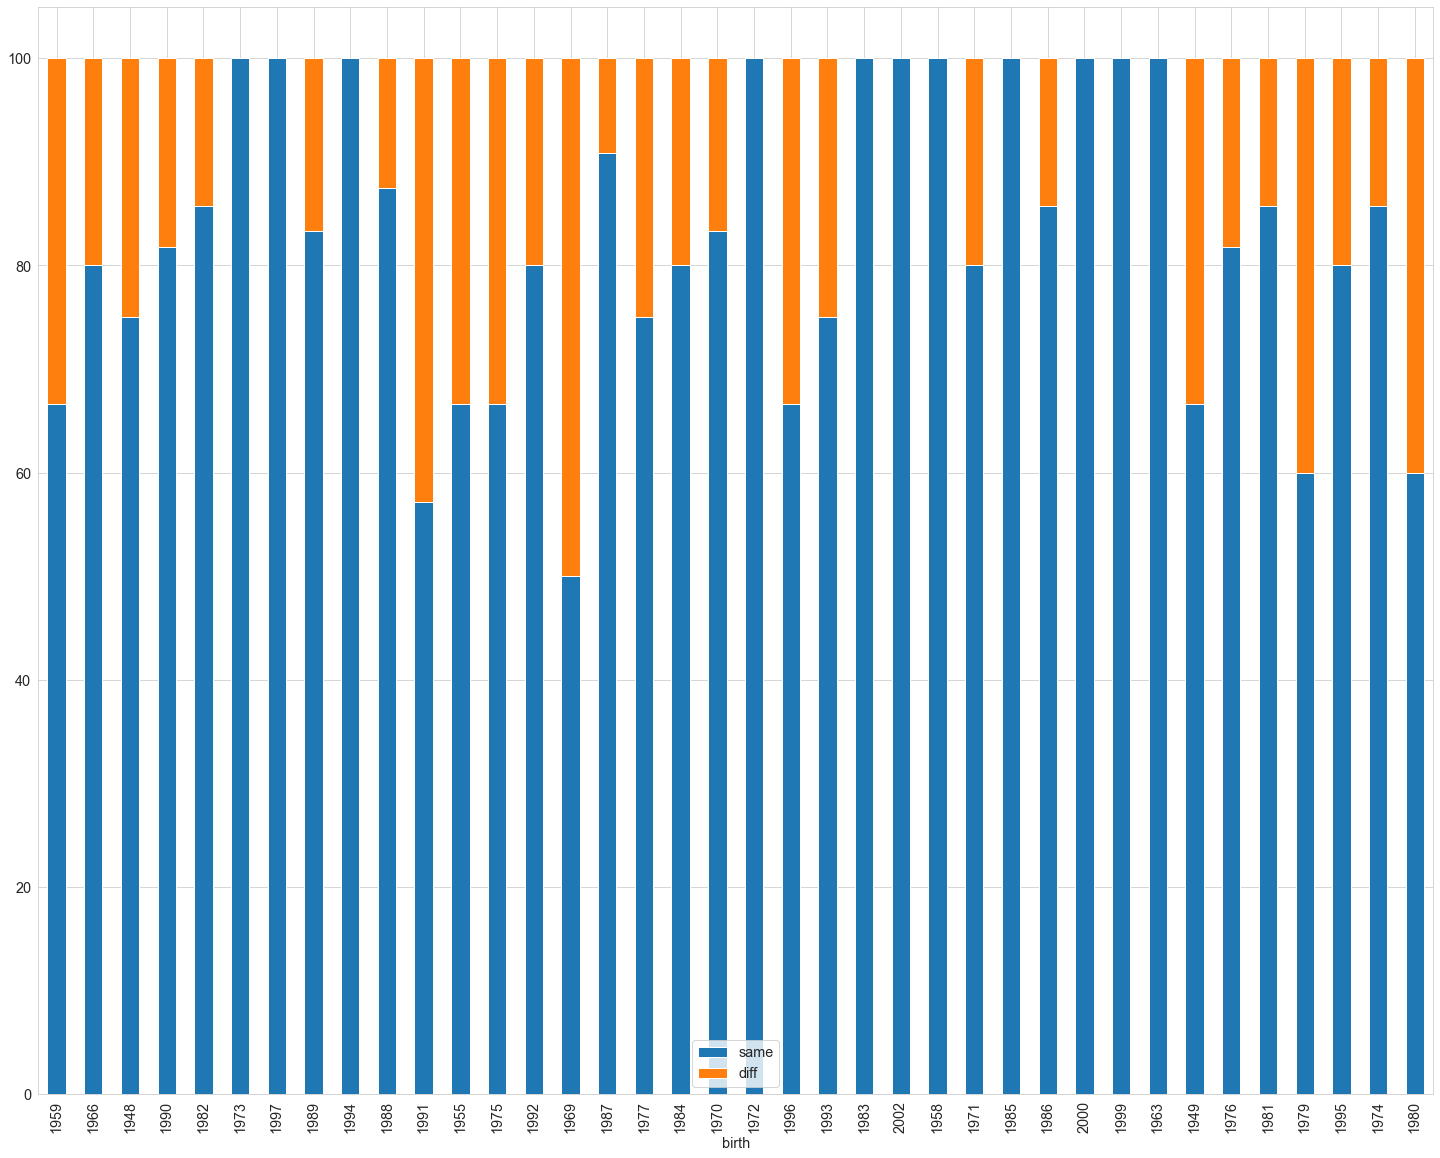

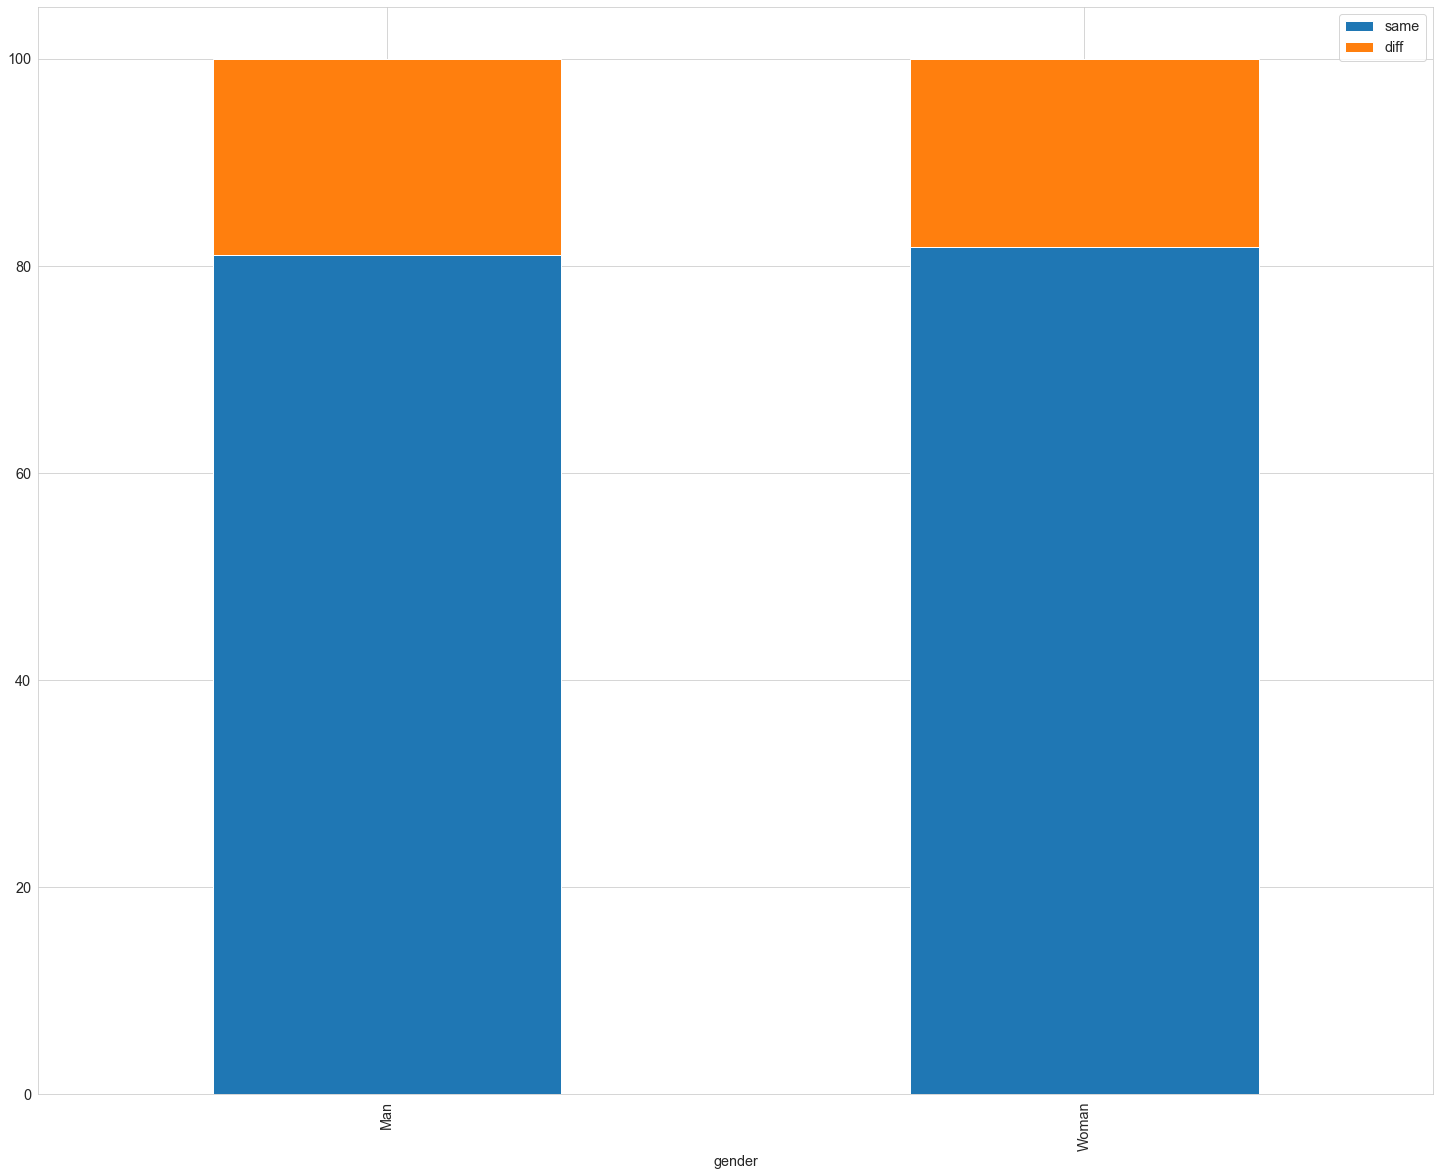

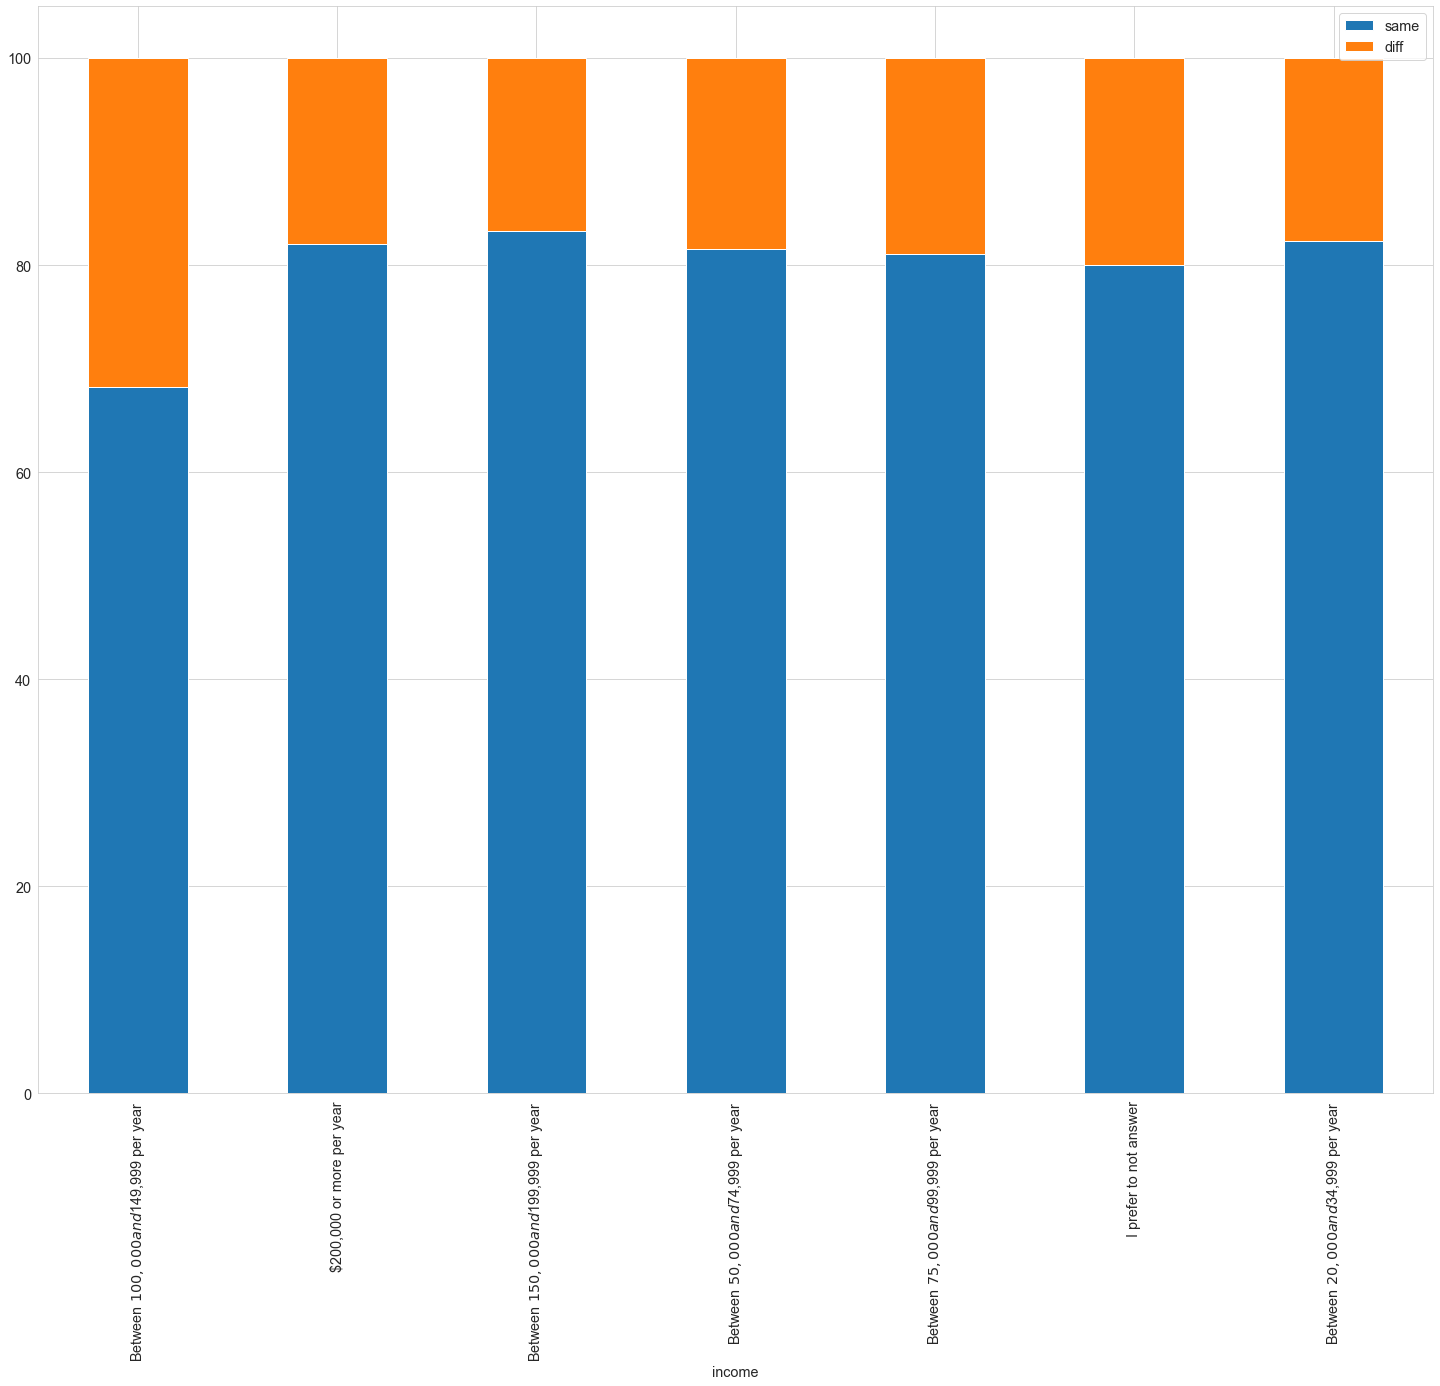

C:\Users\Achituv\anaconda3\envs\ox\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


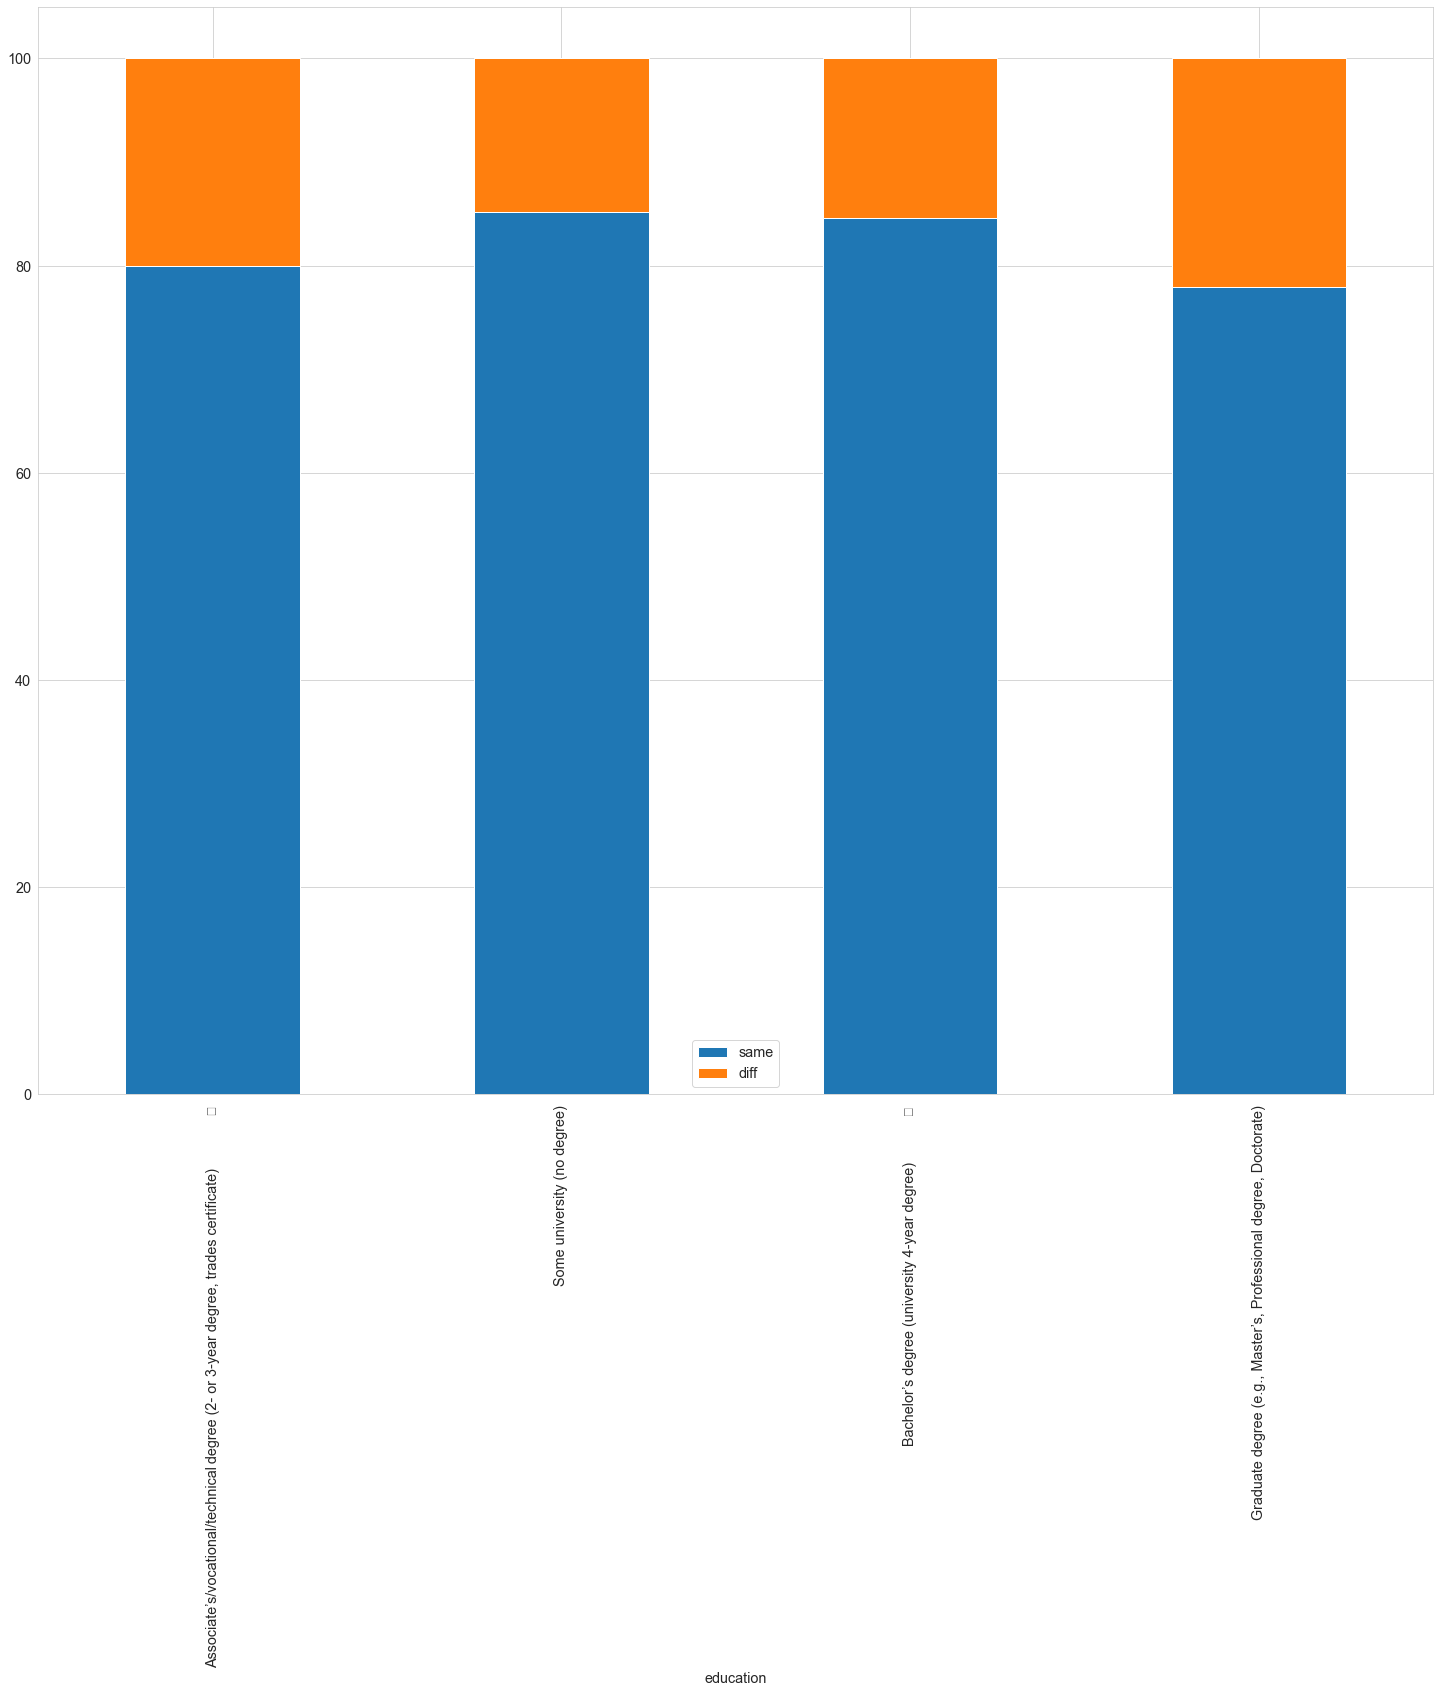

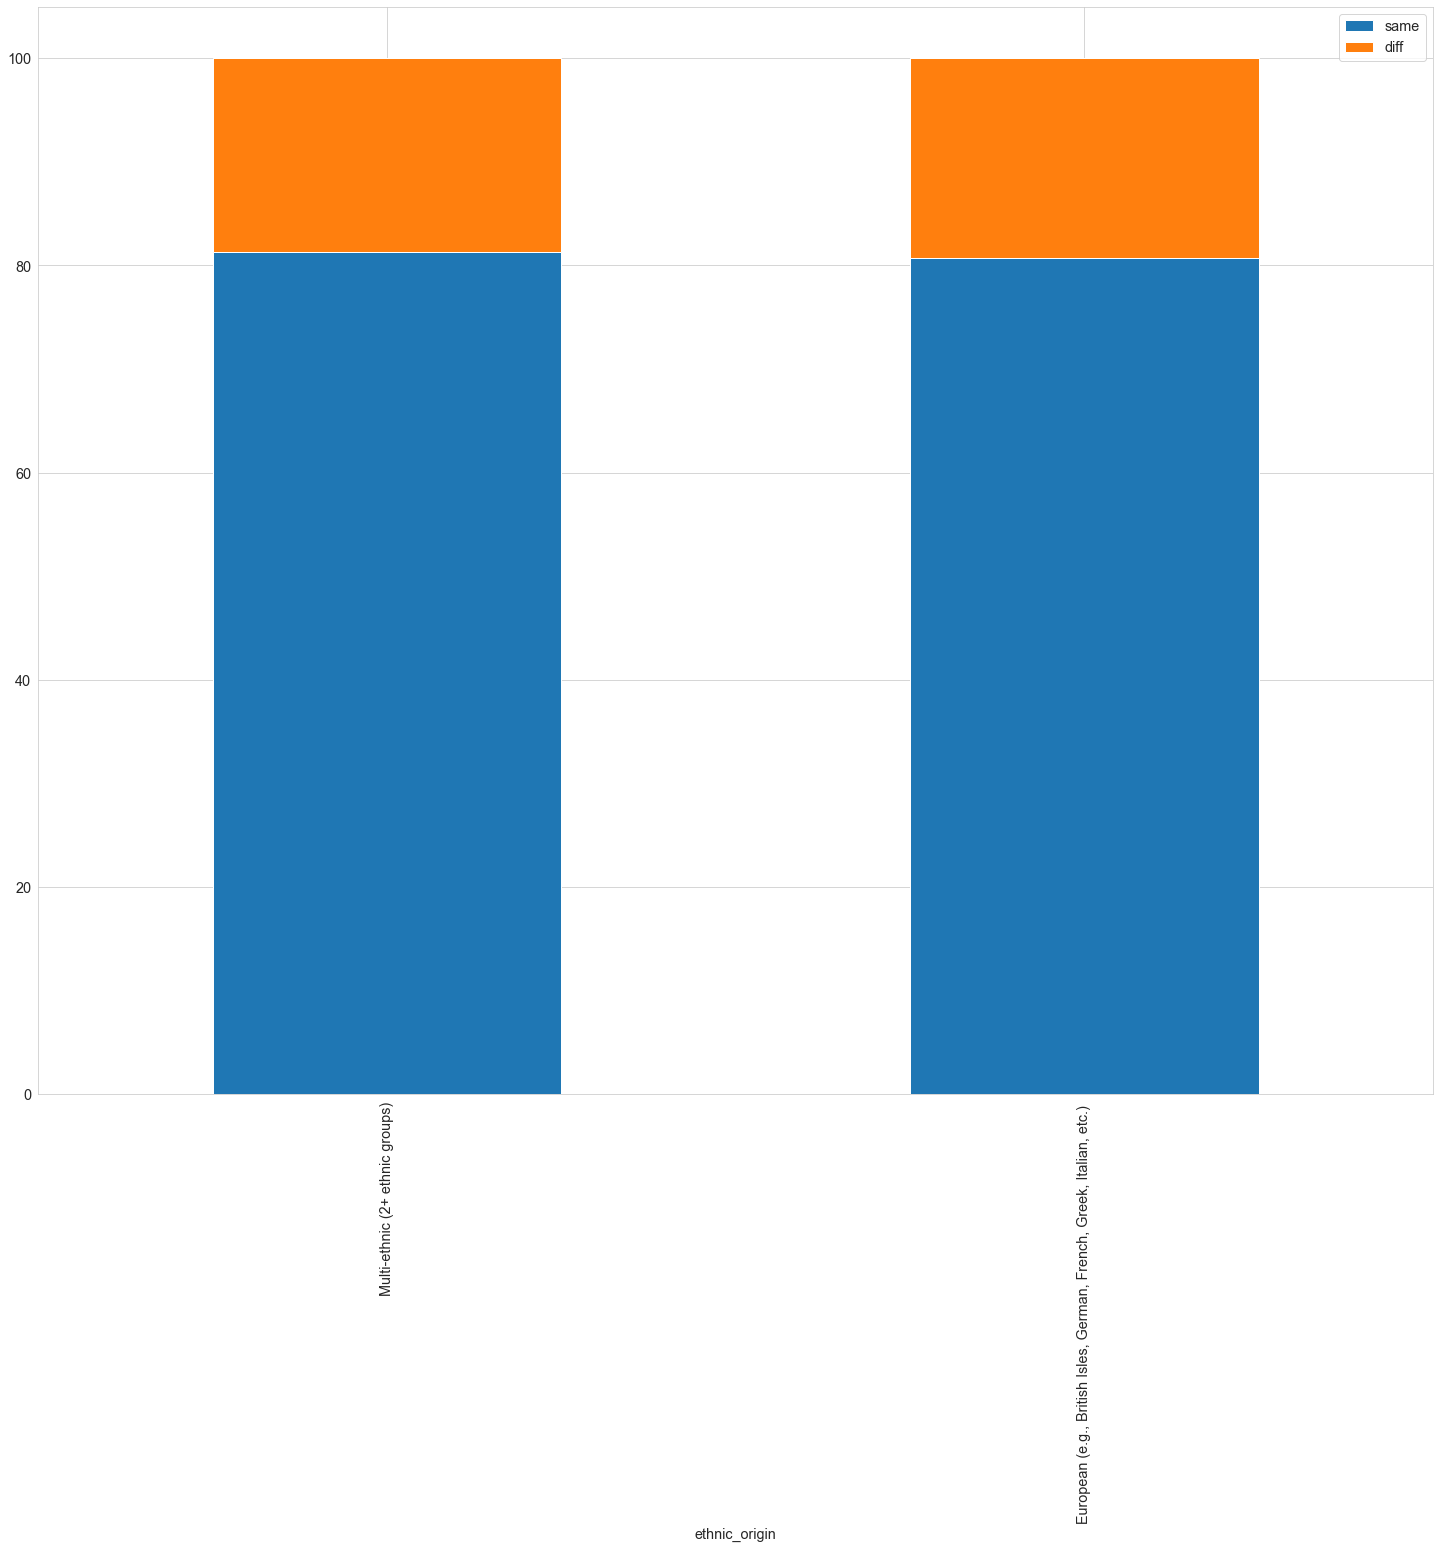

In [30]:
for dft in data_store:
    df= dft.copy()
    q_name = df.index.name
    print(q_name)
    # Calculate recovery-based distributions for the possible answers to a given question

    sum_per_answer = df.sum(axis=1)
    df[per_cols_by_ans] = df.div(sum_per_answer, axis=0)*100

    # Less popular answers  should be removed, which is relative to the number of possible answers
    temp_sum = df[cols].sum().sum()
    tolerance = temp_sum/(len(df)*2)
    rem_df = df[sum_per_answer<tolerance]
    print('those are not include in the results presentation since less than {} tolerance  {}'.format(tolerance,rem_df))
    new_df = df[sum_per_answer>tolerance]
    # Make a table to export with the real and relative (%) values on the same column
    df_table= DataFrame(columns=cols)
    df_table[df_table.columns] = new_df.apply(lambda x: prep_for_export(x),axis=1)
    df_table.to_csv('python/notebooks/output/is_same/csv/'+q_name +'.csv')
    df_table

    # Plot the results and save them on the disk
    df_show= DataFrame(columns=cols)
    df_show[cols] = new_df[per_cols_by_ans]
    df_show.plot.bar(stacked=True)
    plt.savefig('python/notebooks/output/is_same/figs/'+q_name+'.png')

    # Indicate when there is interesting results
    find_max= df_show.copy()
    # res save the index of the one with max absolute distance from the average
    res= (abs(find_max.mean() - find_max).idxmax())
    def is_intersting_def(temp_col):
        df_filter = temp_col.reset_index() # Move the question to a column
        outlier_place = df_filter.columns[-1]  # The state to examine
        outlier_att = res[outlier_place] # A possible outlier answer

        # The value for  the possible outlier answer
        is_intersting = df_filter[df_filter[q_name]==outlier_att]
        val_outlier = is_intersting[outlier_place]
        val_outlier
        # Determine the mean and standard deviation without taking into account suspicious outlier
        not_outlier = df_filter[df_filter[q_name]!=outlier_att][outlier_place]
        new_mean = not_outlier.mean()
        new_std = not_outlier.std()
        # Test to determine if it is an outlier and to find out if the results are interesting
        if (abs(val_outlier - new_mean) - new_std*2.5  > 0).any():
            print ('for {} ({}) : {} is outlier (new_mean:{}, new_std:{})'.format(outlier_place,round(val_outlier.values[0],2),outlier_att,round(new_mean,2),round(new_std,2)))
    res =find_max.apply(is_intersting_def)